# **Project Name**    -  **Telecom Churn Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Customer churn prediction is extremely important for any business as it recognizes the clients who are likely to stop using their services.

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyse customer-level data of a leading telecom firm, do exploratory data analysis to identify the main indicators  why customers are leaving the company.

### Why do we need it?

Customer churn is often referred to as customer attrition, or customer defection which is the rate at which the customers are lost. Telecom companies often use customer churn as a key business metrics to predict the number of customers that will leave a telecom service provider. Churn is significant in the telecommunication industry because it directly affects the competitiveness of the service provider.

It's easy to loss customers but too difficult to aquire one. One churned cutomer will make 3-4 customers away those might be acquired by your teleservice provider 
with "POWER OF WORDS".

When Jio provided free internnet services to everyone, and started acquiring maximum number of customers, so cutomer churn rate for other teleservice providers increased and customers from other teleservice providers those who converted to JIO spread the benefit of JIO to their relatives and friends and they also converted too easily. So, "POWER OF WORDS" also comes into action that wrong and bad reviews spread first. 

# ***1. Know Your Data***

### Import Libraries

In [5]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import *
import math


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

import graphviz
sns.set_style('darkgrid') 

import warnings
warnings.filterwarnings('ignore')

In [14]:
import pandas as pd
df20 = pd.read_csv("churn-bigml-20.csv")
df80 = pd.read_csv("churn-bigml-80.csv")
df = pd.concat([df20, df80], ignore_index=True)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [15]:
# Dataset Info
print(df.shape)
df.info()

(3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 

In [16]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [17]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

<Axes: >

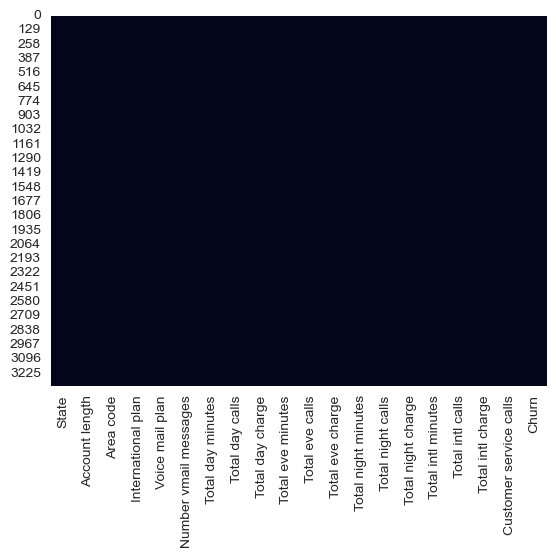

In [18]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The dataset given is a dataset from Telecommunication industry, and we have to analysis the churn of customers and the insights behind it.

Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

The above dataset has 3333 rows and 20 columns. There are no mising values and duplicate values in the dataset. 

# ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [20]:
# Dataset Describe
df.describe(include='all')

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333,3333.000000,3333.000000,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  State is 51 .
No. of unique values in  Account length is 212 .
No. of unique values in  Area code is 3 .
No. of unique values in  International plan is 2 .
No. of unique values in  Voice mail plan is 2 .
No. of unique values in  Number vmail messages is 46 .
No. of unique values in  Total day minutes is 1667 .
No. of unique values in  Total day calls is 119 .
No. of unique values in  Total day charge is 1667 .
No. of unique values in  Total eve minutes is 1611 .
No. of unique values in  Total eve calls is 123 .
No. of unique values in  Total eve charge is 1440 .
No. of unique values in  Total night minutes is 1591 .
No. of unique values in  Total night calls is 120 .
No. of unique values in  Total night charge is 933 .
No. of unique values in  Total intl minutes is 162 .
No. of unique values in  Total intl calls is 21 .
No. of unique values in  Total intl charge is 162 .
No. of unique values in  Customer service calls is 10 .
No. of unique values in  Churn is 2

In [22]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [23]:
df["Area code"].value_counts()

415    1655
510     840
408     838
Name: Area code, dtype: int64

# 3. ***Data Wrangling***:
Data wrangling is the process of transforming and structuring data from one raw form into a desired format with the intent of improving data quality and making it more consumable and useful for analytics or machine learning.

### Data Wrangling Code

In [24]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df_0=df.copy()
# Checking Shape of True Value
print("No. of customers Churning : -",len(df_0[df_0['Churn']==True]))
# Assigning churn customers data to variable df_churn
df_churn=df_0[(df_0['Churn']==True)]

No. of customers Churning : - 483


In [25]:
# Churn data groupby Area Code Wise
pd.DataFrame(df_0.groupby('Area code')['Churn'].value_counts().reset_index(name="Count"))

,Area code,Churn,Count
0,408,False,716
1,408,True,122
2,415,False,1419
3,415,True,236
4,510,False,715
5,510,True,125


In [26]:
# Getting Unique States
print(df_0['State'].unique())
print(" ")
# Getting Unique States Count
print("Unique States Count is ",df_0['State'].nunique(),".")

['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']
 
Unique States Count is  51 .


In [27]:
# Churn Counts grouby State wise
pd.DataFrame(df_0.groupby('State')['Churn'].value_counts(  ).reset_index(name="Count"))

,State,Churn,Count
0,AK,False,49
1,AK,True,3
2,AL,False,72
3,AL,True,8
4,AR,False,44
...,...,...,...
97,WI,True,7
98,WV,False,96
99,WV,True,10
100,WY,False,68


In [28]:
# Assigning churn customers data with no international plan
df_churn_intl_no=df_churn[df_churn['International plan']=='No']
# Assigning churn customers data with international plan
df_churn_intl_yes=df_churn[df_churn['International plan']=='Yes']

In [29]:
# Churn customers data with no international plan value counts
df_churn_intl_no['Area code'].value_counts()

415    174
408     90
510     82
Name: Area code, dtype: int64

In [30]:
# Creating call duration column for customers with no international plan
df_churn_intl_no['Days_1call_duration']=df_churn_intl_no['Total day minutes']/df_churn_intl_no['Total day calls']
df_churn_intl_no['intern_1call_duration']=df_churn_intl_no['Total intl minutes']/df_churn_intl_no['Total intl calls']

df_churn_intl_no['evening_1call_duration']=df_churn_intl_no['Total eve minutes']/df_churn_intl_no['Total eve calls']
df_churn_intl_no['night_1call_duration']=df_churn_intl_no['Total night minutes']/df_churn_intl_no['Total night calls']

In [31]:
# Creating price rate per minute column for customers with international plan
df_churn_intl_yes['international_rate_per_min']=df_churn_intl_yes['Total intl charge']/df_churn_intl_yes['Total intl minutes']
df_churn_intl_yes['day_rate_per_min']=df_churn_intl_yes['Total day charge']/df_churn_intl_yes['Total day minutes']
df_churn_intl_yes['eve_rate_per_min']=df_churn_intl_yes['Total eve charge']/df_churn_intl_yes['Total eve minutes']
df_churn_intl_yes['night_rate_per_min']=df_churn_intl_yes['Total night charge']/df_churn_intl_yes['Total night minutes']

In [32]:
# Checking Number of voice mail sent for customers with no international plan
df_churn_intl_no['Number vmail messages'].value_counts().reset_index(name="User Count")

,index,User Count
0,0,302
1,33,5
2,36,4
3,31,4
4,32,3
5,28,3
6,29,3
7,34,2
8,30,2
9,27,2


In [33]:
# Checking Number of voice mail sent for customers with international plan
df_churn_intl_yes['Number vmail messages'].value_counts().reset_index(name="User Count")

,index,User Count
0,0,101
1,29,5
2,26,4
3,28,3
4,32,3
5,41,3
6,42,2
7,35,2
8,16,1
9,44,1


In [35]:
# Assigning Customers data with no international plan and voice mail plan
voice_mail_plan_yes =df_churn_intl_no[df_churn_intl_no['Voice mail plan']=='Yes']
voice_mail_plan_yes.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Days_1call_duration,intern_1call_duration,evening_1call_duration,night_1call_duration
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,100.863636,441.000000,31.818182,163.306818,100.977273,27.762727,195.122727,101.363636,16.585909,197.986364,102.704545,8.909091,10.202273,4.363636,2.755455,3.295455,1.664043,2.908110,1.969882,2.014046
std,35.580626,45.294386,6.728187,47.918363,20.274269,8.146506,52.169344,20.291012,4.434638,50.631402,19.078272,2.277850,2.615116,1.942079,0.706022,1.719648,0.562243,1.788427,0.566707,0.696591
min,17.000000,408.000000,17.000000,82.300000,59.000000,13.990000,75.300000,56.000000,6.400000,87.400000,49.000000,3.930000,5.800000,1.000000,1.570000,0.000000,0.783810,1.066667,0.977922,0.874167
25%,77.000000,408.000000,28.000000,133.275000,86.500000,22.655000,162.250000,90.750000,13.790000,166.450000,90.000000,7.490000,8.675000,3.000000,2.342500,2.000000,1.244826,1.545833,1.529318,1.436487
50%,103.000000,415.000000,32.000000,167.350000,100.500000,28.450000,200.250000,102.500000,17.025000,191.350000,103.000000,8.615000,10.050000,4.000000,2.715000,4.000000,1.613594,2.216667,1.828991,2.021330
75%,123.000000,510.000000,35.250000,191.675000,114.250000,32.587500,232.525000,116.250000,19.767500,224.400000,115.250000,10.095000,11.800000,5.250000,3.190000,4.000000,1.955641,3.650000,2.372122,2.423838
max,174.000000,510.000000,48.000000,322.400000,147.000000,54.810000,315.400000,136.000000,26.810000,321.200000,145.000000,14.450000,15.700000,11.000000,4.240000,6.000000,3.504348,10.000000,3.218367,3.767347


In [36]:
# Assigning customers data with international plan and no voice mail plan
voice_mail_plan_yes=df_churn_intl_yes[df_churn_intl_yes['Voice mail plan']=='Yes']
voice_mail_plan_yes.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,international_rate_per_min,day_rate_per_min,eve_rate_per_min,night_rate_per_min
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,109.416667,442.277778,29.750000,192.813889,101.555556,32.779722,211.811111,100.472222,18.004444,187.419444,101.027778,8.433333,12.297222,4.972222,3.320278,1.722222,0.270018,0.170007,0.085003,0.044996
std,32.514942,45.647476,7.721491,50.202886,16.306781,8.534531,46.736794,19.395855,3.972455,44.774456,19.549916,2.015419,3.332565,4.003471,0.899328,2.036960,0.000251,0.000019,0.000016,0.000017
min,36.000000,408.000000,15.000000,103.200000,59.000000,17.540000,107.100000,61.000000,9.100000,82.300000,67.000000,3.700000,4.100000,2.000000,1.110000,0.000000,0.269512,0.169961,0.084967,0.044957
25%,89.750000,413.250000,26.000000,156.400000,89.750000,26.592500,181.875000,93.000000,15.460000,157.750000,81.750000,7.097500,10.600000,2.000000,2.862500,0.000000,0.269845,0.169993,0.084992,0.044986
50%,113.000000,415.000000,29.000000,196.150000,102.000000,33.350000,209.350000,99.000000,17.795000,192.450000,101.500000,8.660000,13.350000,3.000000,3.605000,1.000000,0.270000,0.170014,0.085003,0.044999
75%,131.500000,510.000000,35.000000,222.450000,114.250000,37.820000,253.400000,112.500000,21.540000,214.125000,117.250000,9.635000,14.200000,6.000000,3.830000,3.000000,0.270141,0.170021,0.085014,0.045006
max,188.000000,510.000000,44.000000,292.900000,137.000000,49.790000,312.500000,133.000000,26.560000,271.700000,137.000000,12.230000,20.000000,20.000000,5.400000,9.000000,0.270732,0.170032,0.085033,0.045026


In [37]:
# Assigning customers data with international plan and no voice plan
df_true_intl=df_churn[(df_churn['International plan']=='Yes')&(df_churn['Voice mail plan']=='No')]
df_true_intl.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,101.000000,101.000000,101.0,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,103.297030,443.504950,0.0,193.914851,97.792079,32.965743,208.412871,99.089109,17.715347,197.213861,100.930693,8.874851,11.599010,3.574257,3.131782,1.564356
std,38.004354,45.591803,0.0,65.293797,22.023768,11.099667,56.404730,18.194559,4.794301,50.817227,20.104356,2.287276,2.725197,2.393101,0.735886,1.395821
min,2.000000,408.000000,0.0,46.500000,42.000000,7.910000,93.700000,60.000000,7.960000,72.400000,53.000000,3.260000,5.000000,1.000000,1.350000,0.000000
25%,76.000000,415.000000,0.0,145.000000,83.000000,24.650000,172.300000,86.000000,14.650000,164.000000,86.000000,7.380000,9.700000,2.000000,2.620000,0.000000
50%,103.000000,415.000000,0.0,194.200000,102.000000,33.010000,203.400000,98.000000,17.290000,192.000000,98.000000,8.640000,11.400000,3.000000,3.080000,1.000000
75%,126.000000,510.000000,0.0,242.200000,113.000000,41.170000,249.400000,111.000000,21.200000,235.200000,115.000000,10.580000,13.700000,5.000000,3.700000,2.000000
max,224.000000,510.000000,0.0,346.800000,141.000000,58.960000,363.700000,159.000000,30.910000,332.700000,151.000000,14.970000,17.900000,10.000000,4.830000,5.000000


In [43]:
# Assigning Customers data with no international plan and having voice mail plan
df_true_voice=df_churn[(df_churn['International plan']=='No')&(df_churn['Voice mail plan']=='Yes')]
df_true_voice.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000
mean,100.863636,441.000000,31.818182,163.306818,100.977273,27.762727,195.122727,101.363636,16.585909,197.986364,102.704545,8.909091,10.202273,4.363636,2.755455,3.295455
std,35.580626,45.294386,6.728187,47.918363,20.274269,8.146506,52.169344,20.291012,4.434638,50.631402,19.078272,2.277850,2.615116,1.942079,0.706022,1.719648
min,17.000000,408.000000,17.000000,82.300000,59.000000,13.990000,75.300000,56.000000,6.400000,87.400000,49.000000,3.930000,5.800000,1.000000,1.570000,0.000000
25%,77.000000,408.000000,28.000000,133.275000,86.500000,22.655000,162.250000,90.750000,13.790000,166.450000,90.000000,7.490000,8.675000,3.000000,2.342500,2.000000
50%,103.000000,415.000000,32.000000,167.350000,100.500000,28.450000,200.250000,102.500000,17.025000,191.350000,103.000000,8.615000,10.050000,4.000000,2.715000,4.000000
75%,123.000000,510.000000,35.250000,191.675000,114.250000,32.587500,232.525000,116.250000,19.767500,224.400000,115.250000,10.095000,11.800000,5.250000,3.190000,4.000000
max,174.000000,510.000000,48.000000,322.400000,147.000000,54.810000,315.400000,136.000000,26.810000,321.200000,145.000000,14.450000,15.700000,11.000000,4.240000,6.000000


In [39]:
# Assigning Customers data with no international plan and no voice mail plan
df_true_no=df_churn[(df_churn['International plan']=='No')&(df_churn['Voice mail plan']=='No')]
df_true_no.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,302.000000,302.000000,302.0,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,101.910596,434.920530,0.0,219.295695,102.546358,37.280795,216.337086,100.947020,18.388609,211.092053,99.811258,9.499338,10.281457,4.235099,2.776722,2.357616
std,41.281249,41.027343,0.0,71.230008,22.122346,12.109283,50.205869,20.236242,4.267232,44.703920,20.134287,2.011642,2.639966,2.432004,0.712955,1.893666
min,1.000000,408.000000,0.0,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,51.000000,2.130000,2.000000,1.000000,0.540000,0.000000
25%,75.250000,408.000000,0.0,158.025000,89.000000,26.862500,180.625000,87.000000,15.352500,178.200000,84.250000,8.020000,8.700000,3.000000,2.350000,1.000000
50%,100.500000,415.000000,0.0,237.950000,104.000000,40.450000,216.250000,102.000000,18.385000,210.100000,100.000000,9.450000,10.300000,4.000000,2.780000,2.000000
75%,126.750000,415.000000,0.0,272.700000,118.000000,46.360000,251.250000,114.000000,21.355000,242.700000,115.000000,10.920000,12.075000,5.000000,3.262500,4.000000
max,225.000000,510.000000,0.0,350.800000,165.000000,59.640000,350.500000,168.000000,29.790000,354.900000,158.000000,15.970000,18.300000,15.000000,4.940000,9.000000


In [40]:
# Assigning Customers data with both international plan and voice mail plan
df_true_yes=df_churn[(df_churn['International plan']=='Yes')&(df_churn['Voice mail plan']=='Yes')]
df_true_yes.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,109.416667,442.277778,29.750000,192.813889,101.555556,32.779722,211.811111,100.472222,18.004444,187.419444,101.027778,8.433333,12.297222,4.972222,3.320278,1.722222
std,32.514942,45.647476,7.721491,50.202886,16.306781,8.534531,46.736794,19.395855,3.972455,44.774456,19.549916,2.015419,3.332565,4.003471,0.899328,2.036960
min,36.000000,408.000000,15.000000,103.200000,59.000000,17.540000,107.100000,61.000000,9.100000,82.300000,67.000000,3.700000,4.100000,2.000000,1.110000,0.000000
25%,89.750000,413.250000,26.000000,156.400000,89.750000,26.592500,181.875000,93.000000,15.460000,157.750000,81.750000,7.097500,10.600000,2.000000,2.862500,0.000000
50%,113.000000,415.000000,29.000000,196.150000,102.000000,33.350000,209.350000,99.000000,17.795000,192.450000,101.500000,8.660000,13.350000,3.000000,3.605000,1.000000
75%,131.500000,510.000000,35.000000,222.450000,114.250000,37.820000,253.400000,112.500000,21.540000,214.125000,117.250000,9.635000,14.200000,6.000000,3.830000,3.000000
max,188.000000,510.000000,44.000000,292.900000,137.000000,49.790000,312.500000,133.000000,26.560000,271.700000,137.000000,12.230000,20.000000,20.000000,5.400000,9.000000


In [42]:
print("Churned Customer Shape:-",df_churn.shape)
print(" ")
print("customers data with international plan and no voice mail plan:-",df_true_intl.shape)
print(" ")
print("Customers data with no international plan and having voice mail plan:-",df_true_voice.shape)
print(" ")
print("Customers data with no international plan and no voice mail plan:-",df_true_no.shape)
print(" ")
print("Customers data with both international plan and voice mail plan:-",df_true_yes.shape)
print(" ")

Churned Customer Shape:- (483, 20)
 
customers data with international plan and no voice mail plan:- (101, 20)
 
Customers data with no international plan and having voice mail plan:- (44, 20)
 
Customers data with no international plan and no voice mail plan:- (302, 20)
 
Customers data with both international plan and voice mail plan:- (36, 20)
 


In [47]:
print("Customers data with no international plan and having voice mail plan maximum voice message sent:-",df_true_voice['Number vmail messages'].max())
print(" ")
# Assigning customers data to respective area codes
df_true_voice_415=df_true_voice[df_true_voice['Area code']==415]
df_true_voice_510=df_true_voice[df_true_voice['Area code']==510]
df_true_voice_408=df_true_voice[df_true_voice['Area code']==408]

print("Customers data with no international plan and having voice mail plan voice message sent in area 415 mean, median:-",df_true_voice_415['Number vmail messages'].mean(),",",df_true_voice_415['Number vmail messages'].median())
print(" ")

print("Customers data with no international plan and having voice mail plan customer service calls in area 415 mean, median:-",df_true_voice_415['Customer service calls'].mean(),",",df_true_voice_415['Customer service calls'].median())
print(" ")

print("Customers data with no international plan and having voice mail plan voice message sent in area 510 max, mean, median & customer service calls in area 510 mean, median:-"
,df_true_voice_510['Number vmail messages'].max(),",",df_true_voice_510['Number vmail messages'].mean(),",",df_true_voice_510['Number vmail messages'].median(),",",df_true_voice_510['Customer service calls'].mean(),",",df_true_voice_510['Customer service calls'].median())
print(" ")

print("Customers data with no international plan and having voice mail plan voice message sent in area 408 max, mean, median & customer service calls in area 408 mean, median:-"
,df_true_voice_408['Number vmail messages'].max(),",",df_true_voice_408['Number vmail messages'].mean(),",",df_true_voice_408['Number vmail messages'].median(),",",df_true_voice_408['Customer service calls'].mean(),",",df_true_voice_408['Customer service calls'].median())
print(" ")
# Assigning customers data to respective area codes
df_true_yes_415=df_true_yes[df_true_yes['Area code']==415]
df_true_yes_510=df_true_yes[df_true_yes['Area code']==510]
df_true_yes_408=df_true_yes[df_true_yes['Area code']==408]

print("Customers data with both international plan and voice mail plan customer service calls mean & voice mail sent max :-"
,df_true_yes['Customer service calls'].mean(),df_true_yes['Number vmail messages'].max())
print(" ")
print("Customers data with both international plan and voice mail plan in area 415 voice mail sent max, mean, median :-"
,df_true_yes_415['Number vmail messages'].max(),",",df_true_yes_415['Number vmail messages'].mean(),",",df_true_yes_415['Number vmail messages'].median())
print(" ")
print("Customers data with both international plan and voice mail plan in area 510 voice mail sent max, mean, median :-"
,df_true_yes_510['Number vmail messages'].max(),",",df_true_yes_510['Number vmail messages'].mean(),",",df_true_yes_510['Number vmail messages'].median())
print(" ")
print("Customers data with both international plan and voice mail plan in area 408 voice mail sent max, mean, median :-"
,df_true_yes_408['Number vmail messages'].max(),",",df_true_yes_408['Number vmail messages'].mean(),",",df_true_yes_408['Number vmail messages'].median())


Customers data with no international plan and having voice mail plan maximum voice message sent:- 48
 
Customers data with no international plan and having voice mail plan voice message sent in area 415 mean, median:- 31.72222222222222 , 31.0
 
Customers data with no international plan and having voice mail plan customer service calls in area 415 mean, median:- 3.388888888888889 , 4.0
 
Customers data with no international plan and having voice mail plan voice message sent in area 510 max, mean, median & customer service calls in area 510 mean, median:- 45 , 32.46153846153846 , 33.0 , 3.6153846153846154 , 4.0
 
Customers data with no international plan and having voice mail plan voice message sent in area 408 max, mean, median & customer service calls in area 408 mean, median:- 48 , 31.307692307692307 , 32.0 , 2.8461538461538463 , 2.0
 
Customers data with both international plan and voice mail plan customer service calls mean & voice mail sent max :- 1.7222222222222223 44
 
Customers 

In [52]:
# Assigning customers data with no international plan and having voice mail plan state list in area 415
df_true_voice_415_states=list(df_true_voice_415['State'].unique())
print("States list where customers data with no international plan and having voice mail plan in area 415 :-",df_true_voice_415_states)
print(" ")
# Assigning customers data  with both international plan and voice mail plan state list in area 415
df_true_yes_415_states=list(df_true_yes_415['State'].unique())
print("States List where customers data  with both international plan and voice mail plan in area 415 :-",df_true_yes_415_states)
print(" ")
# Getting Poor Network connectivity states based on our hypothetical logic
poor_netwok_states_415=set(df_true_voice_415_states).intersection(set(df_true_yes_415_states))
print("Poor Network connectivity states in area 415 :-",list(poor_netwok_states_415))

States list where customers data with no international plan and having voice mail plan in area 415 :- ['CT', 'MS', 'OR', 'LA', 'NV', 'VA', 'MT', 'CA', 'ND', 'NY', 'ID', 'NH', 'AR', 'KY', 'KS']
 
States List where customers data  with both international plan and voice mail plan in area 415 :- ['NV', 'WI', 'NM', 'IL', 'OR', 'MN', 'KS', 'WY', 'DE', 'MD', 'TX', 'ME', 'OH']
 
Poor Network connectivity states in area 415 :- ['NV', 'OR', 'KS']


In [53]:
# Assigning Customers data with no international plan and having voice mail plan state list in area 408
df_true_voice_408_states=list(df_true_voice_408['State'].unique())
print("States list Customers data with no international plan and having voice mail plan state list in area 408 :-",df_true_voice_408_states)
print(" ")
# Assigning customers data  with both international plan and voice mail plan state list in area 408
df_true_yes_408_states=list(df_true_yes_408['State'].unique())
print("States list customers data  with both international plan and voice mail plan state list in area 408 :-",df_true_yes_408_states)
print(" ")
# Getting Poor Network connectivity states based on our hypothetical logic
poor_netwok_states_408=set(df_true_voice_408_states).intersection(set(df_true_yes_408_states))
# Getting Common Poor Network connectivity states based on our hypothetical logic from both area 408 & 415
poor_network_states=poor_netwok_states_415.union(poor_netwok_states_408)
print("Poor Network connectivity states in both area 415, 408 :-",list(poor_network_states))

States list Customers data with no international plan and having voice mail plan state list in area 408 :- ['SD', 'NC', 'KY', 'CO', 'NM', 'GA', 'MA', 'UT', 'WA', 'MI', 'PA', 'NH', 'MT']
 
States list customers data  with both international plan and voice mail plan state list in area 408 :- ['MD', 'AL', 'NC', 'NJ', 'ME', 'MA', 'GA', 'ND']
 
Poor Network connectivity states in both area 415, 408 :- ['MA', 'KS', 'NC', 'GA', 'OR', 'NV']


In [54]:
# Assigning Customers data with no international plan and having voice mail plan state list in area 510
df_true_voice_510_states=list(df_true_voice_510['State'].unique())
print("States list Customers data with no international plan and having voice mail plan state list in area 510 :-",df_true_voice_510_states)
print(" ")
# Assigning customers data  with both international plan and voice mail plan state list in area 510
df_true_yes_510_states=list(df_true_yes_510['State'].unique())
print("States list customers data  with both international plan and voice mail plan state list in area 510 :-",df_true_yes_510_states)
print(" ")
# Getting Common  Network Maintainance states based on our hypothetical logic from area 510
maintainence_states=set(df_true_voice_510_states).intersection(set(df_true_yes_510_states))
print("Network needs to be maintenanced in states :-",list(maintainence_states))

States list Customers data with no international plan and having voice mail plan state list in area 510 :- ['UT', 'NJ', 'MS', 'FL', 'WV', 'TN', 'MN', 'SC', 'MT']
 
States list customers data  with both international plan and voice mail plan state list in area 510 :- ['VT', 'WV', 'ME', 'SD', 'NV', 'OK', 'NJ', 'TX', 'ID', 'MI']
 
Network needs to be maintenanced in states :- ['NJ', 'WV']


In [55]:
print(f"Poor Netwok States are {list(poor_network_states)} and Network needs to be maintenanced in states {list(maintainence_states)}.")

Poor Netwok States are ['MA', 'KS', 'NC', 'GA', 'OR', 'NV'] and Network needs to be maintenanced in states ['NJ', 'WV'].


According to my idea, we will get a clear view of the customers those who 
aren't churning through graphical representations but we have to deep dive into 
the churned customer's behaviour and to search for some hypothetical statements and insights which might lead us to the  reason for churning. That's why, I took the Churned customer data to find out the reason or churning behaviour and the pattern. Then, I experimented with different logics to extract some insights. I created some new columns like International, evening, day & night call duration as well as international, day, night, evening call rate per minute. Again, I figured out  those have taken voice mail plan but not using it and sending less no. of voice mails but talking more durations might be facing some network issues as I myself experienced that voice mssg need some more network stability to be sent. Other reasons are noted below which i have found.



 **POOR NETWORK STATES FROM AREA CODE 415,408 :-**

'GA', 'NV', 'OR', 'NC', 'KS', 'MA'

 **STATES NEED MAINTAINANCE OR NEW INSTALLATION REQUIRED :-**

'WV', 'NJ'

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Pie Chart on Dependant Variable i.e., Churn (Univariate)

In [56]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

False    2850
True      483
Name: Churn, dtype: int64
 


<Axes: ylabel='Churn'>

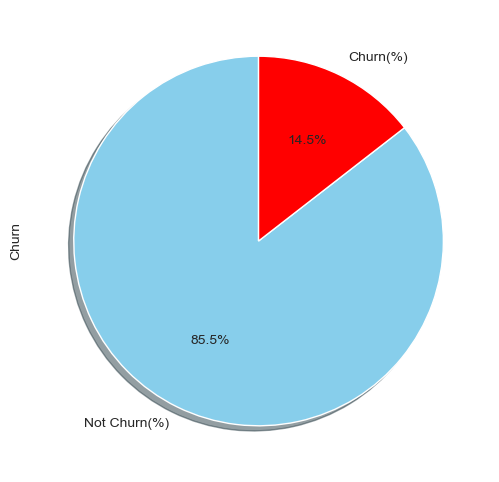

In [57]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.Churn.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn(%)','Churn(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

From the above chart I got to know that, there are 2850 customers which are not churned which is 85.5% of the whole customers data given in the dataset. In other hand, 483 customers are churned which is 14.%% of the whold customers data given in the dataset.


14.5% customers are churned which might look like a small number, but once upon a time the 14.5% was 1.45% which has grown upto 14.5%. So, Immediate action should be taken.


#### Chart - 2 - State Vs. Average True Churn Percentage (Bivariate with Categorical - Numerical)

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

  State  Average True CHurn %
0    HI              5.660377
1    AK              5.769231
2    AZ              6.250000
3    VA              6.493506
4    IA              6.818182
5    LA              7.843137
6    NE              8.196721
7    IL              8.620690
8    WI              8.974359
9    RI              9.230769
 


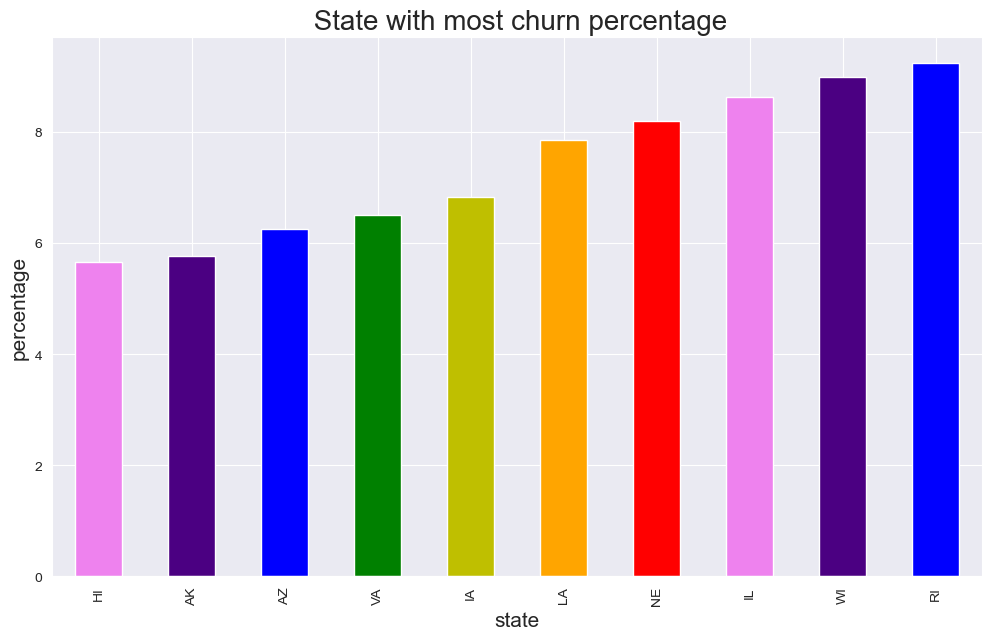

In [58]:
# Chart - 2 visualization code
# Showing Average True Churn Percentage state wise
# Showing top 10 churned state
print((df.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True CHurn %").head(10))
print(" ")

# State vs. average true churn percantage visualization code
# Vizualizing top 10 churned state
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = True).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

#### Chart - 3 - Account Length with Churn Wise (Univariate)

Churn
False    22
True      2
dtype: int64
 


<Axes: >

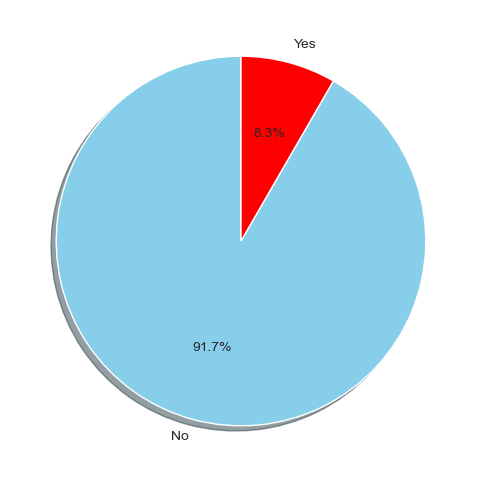

In [59]:
# Chart - 3 visualization code
# One Digit Account Length 
print(df[df['Account length']<=9].loc[:,['Churn']].value_counts())
print(" ")

# Visualizing One Digit Account Length Based on Churn percentage
df[df['Account length']<=9].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

Churn
False    1378
True      225
Name: count, dtype: int64
 


<Axes: ylabel='count'>

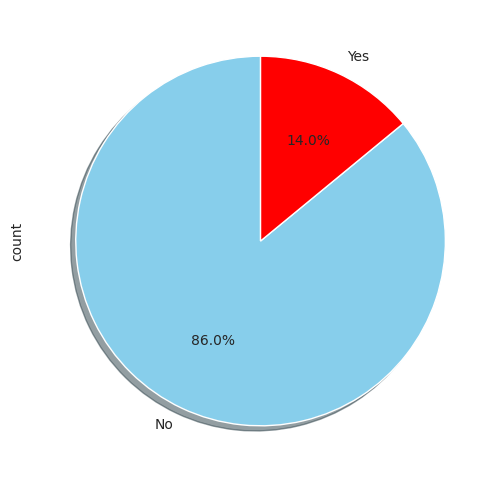

In [38]:
# Two Digit Account Length 
print(df[(df['Account length']<=99) & (df['Account length']>=10)].loc[:,['Churn']].value_counts())
print(" ")

# Visualizing Two Digit Account Length Based on Churn percentage
df[(df['Account length']<=99) & (df['Account length']>=10)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

Churn
False    1450
True      256
dtype: int64
 


<Axes: >

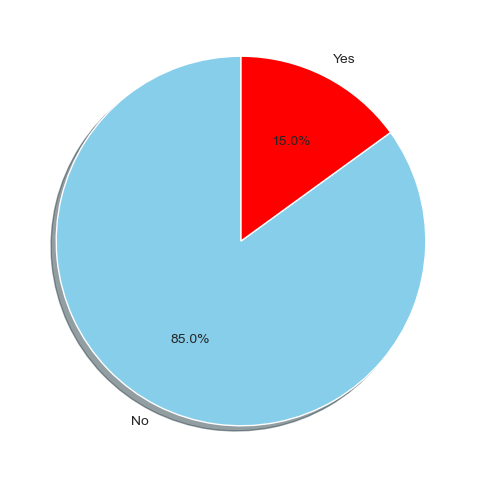

In [60]:
# Three Digit Account Length 
print(df[(df['Account length']<=df['Account length'].max()) & (df['Account length']>=100)].loc[:,['Churn']].value_counts())
print(" ")

# Visualizing Three Digit Account Length Based on Churn percentage
df[(df['Account length']<=df['Account length'].max()) & (df['Account length']>=100)].loc[:,['Churn']].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

<Axes: title={'center': 'Account length'}, xlabel='Churn'>

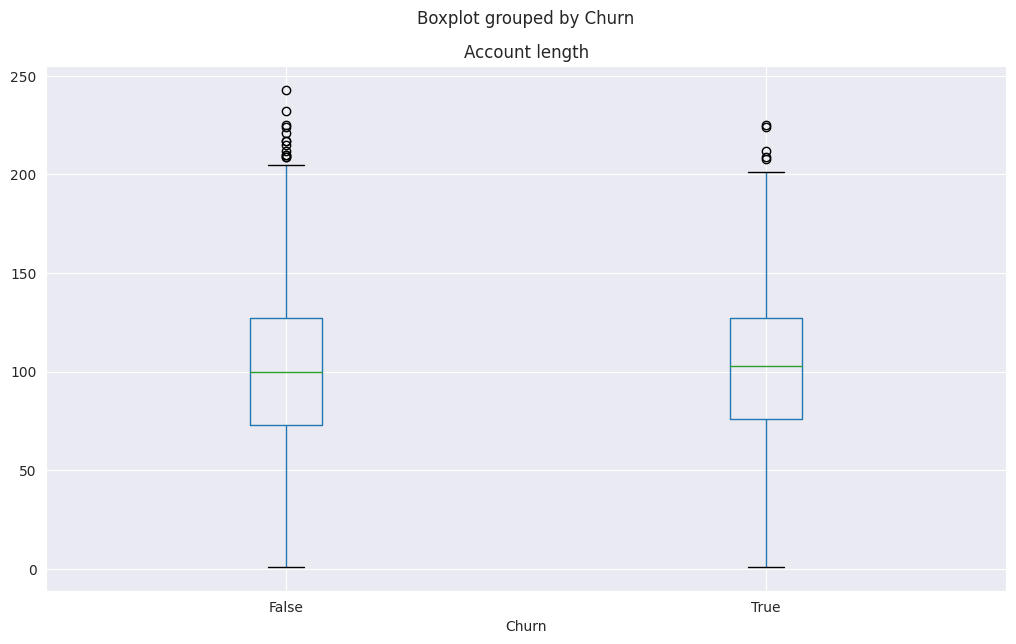

In [40]:
# Box Plot for Account Length attribute
df.boxplot(column='Account length',by='Churn')

Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers. So, I used box plot to get the maximum and minimum value with well sagreggated outliers with well defined mean and median as shown in the box plot graph.

**Account Length**

We can catagories Account Length into three catagories like 

**One Digit Length** 

 Churn True -8.3%

 No. of Churn True-2



 Churn False-91.7%

**Two Digit Length**

Churn True -14.0% 

No. of Churn True-225



Churn False-86.0%


**Three Digit Length**

Churn True -15.0% 

No. of Churn True-256



Churn False-85.0%




**REMARK**


AS from the above  record, we can see that Two digit Account Length customers are churning with a number of 225 
And Three digit Account Length customers are churning with a number of 256





Accoun length is the no. of days the customers are active. So for the new customers those churning rate is too low around 8.3% in percentage and number is 2. They might be just using the telecom service to experience the benefits and they might not be satisfied with the service provided and churned. 

Those people whose account length are between 10 to 99 are having a churning rate of 15%. The customers below 50 might be treated as new customers and more than 55 and less than 99 they mightn't be geting benefits from plan taken. 

Those people whose account length are more than 100 are like of old customers and they might be churning due to no additional offers given to them like power plus plan or other benefits.

So, Account Length is also depicting a clear view of churing reasons and inaights.

#### Chart - 4 - Area Code (Bivariate)

Area code
408    14.558473
415    14.259819
510    14.880952
Name: Churn, dtype: float64
 


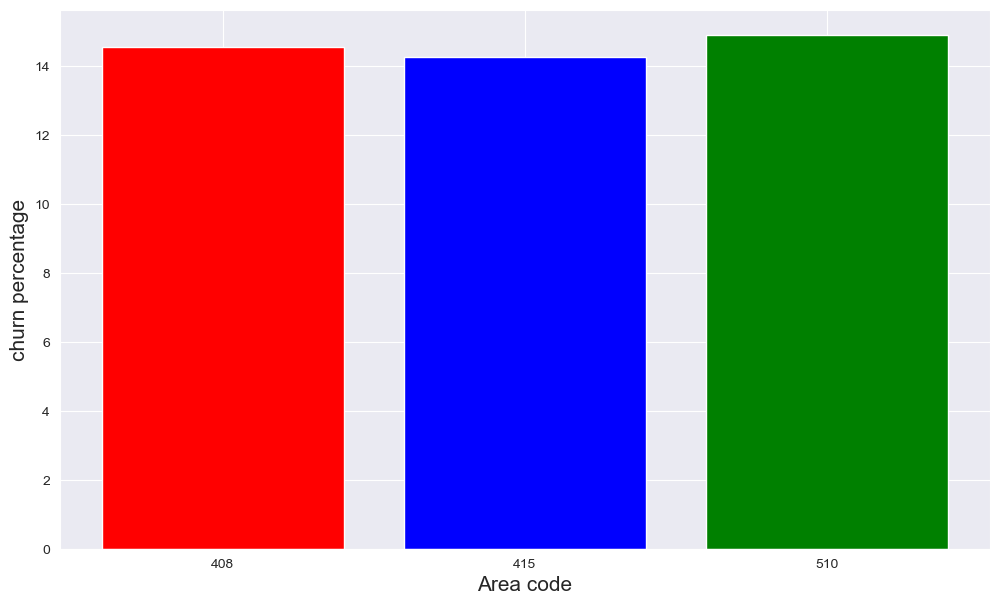

In [61]:

# Chart - 4 visualization code
# Area Code wise average churn Percentage
print(df.groupby('Area code')['Churn'].mean()*100)
print(" ")

# Visualizing code for Area Code wise average churn percentage
a1= list(['408','415' , '510'])
b1= df.groupby('Area code')['Churn'].mean()*100
plt.bar(a1,b1, color=['r','b','g'])

plt.rcParams['figure.figsize'] = (6, 5)


plt.xlabel('Area code', fontsize = 15)
plt.ylabel('churn percentage', fontsize = 15)
plt.show()

Area Code doesn't have any contribution to churn rate for 14% churn rate is same for all the area codes. But while furthur sagreggating the area codes with respective states in those area code, it can be analysed the states in which the issue is happeing. So, it has been defined above.

So, here Area code won't help to create business impact but the respective states wise analysis can help.

#### Chart - 5 - International Plan (Univariate + Bivariate)

<Axes: ylabel='International plan'>

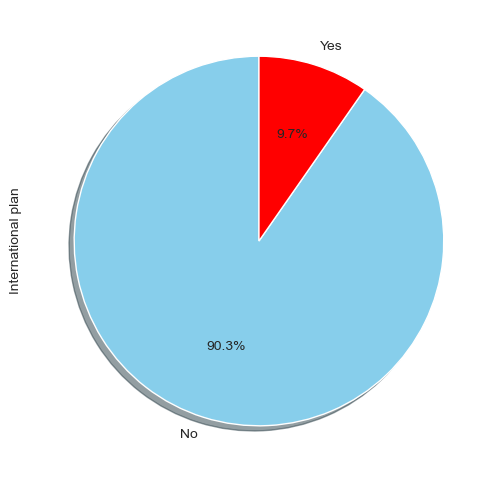

In [62]:
# Chart - 5 visualization code
# Visualizing Percentage of customers taken international plan
df['International plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

In [63]:
# Assigning values for furthur charts
i1 = df['International plan'].unique()
i2 = df.groupby('International plan')['Churn'].mean()*100
i3 = df.groupby(['International plan'])['Total intl charge'].mean()
i4 = df.groupby(["Churn"])['Total intl minutes'].mean()

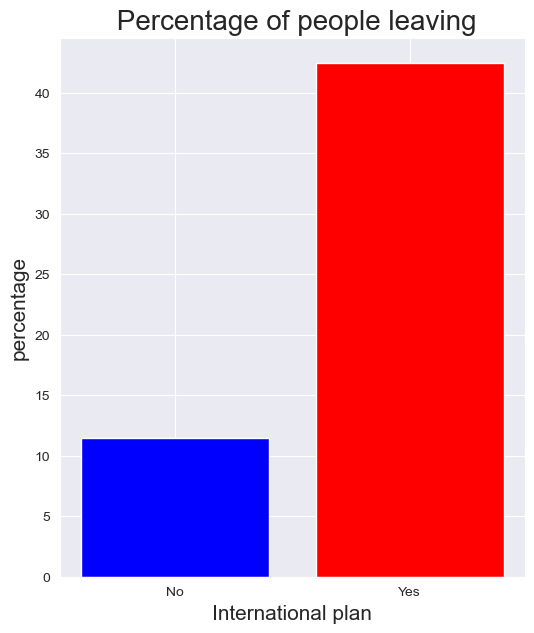

In [64]:
# Visualizing code for people churning percentage having international plan
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i2 , color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

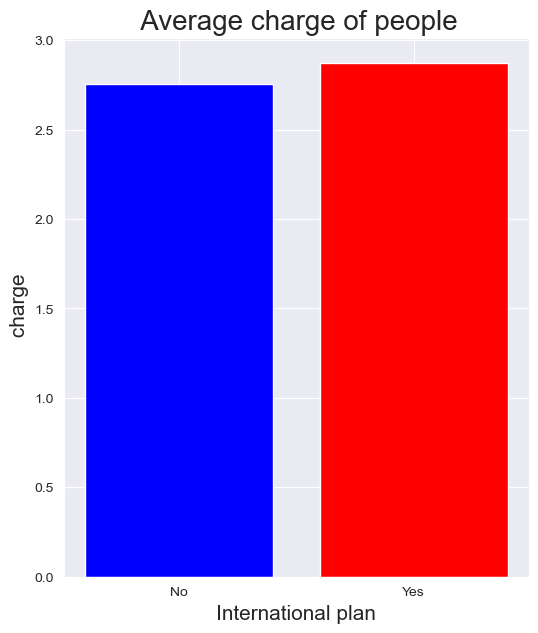

In [65]:
# Visualizing code for average calling charge of customers having international plan
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i3, color=['b','r'])
plt.title(" Average charge of people", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' charge', fontsize = 15)
plt.show()

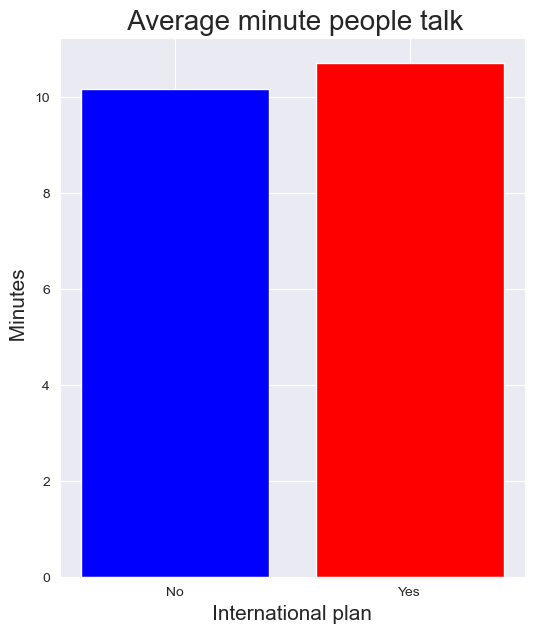

In [66]:
# Visualizing code for average minutes takled by customers having international plan
plt.rcParams['figure.figsize'] = (6, 7)

plt.bar(i1,i4, color=['b','r'])
plt.title(" Average minute people talk", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel(' Minutes', fontsize = 15)
plt.show()

**INTERNATIONAL PLAN**

3010 dont have a international plan

323 have a international plan

Among those who  have a international plan 42.4 % people churn.

Whereas among those who dont have a international plan  only 11.4 % people churn.

Among those who  have a international plan their average charge is 2.86 and they talk for 10.7 minutes average .

Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.15 minutes average .

The reason why people having international plan might be leaving is that they are paying same amount of money for international calls as for those customers who dont have a international plan.Hence they arent getting any benefits for having an international plan so they might be unhappy. 


***Customers with the International Plan tend to churn more frequently ***


#### Chart - 6 - Voice Mail (Univariate + Bivariate)

<Axes: ylabel='Voice mail plan'>

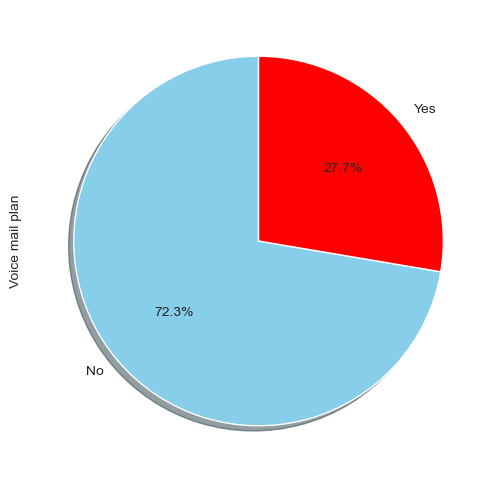

In [67]:
# Chart - 5 visualization code
# vizualizing code for customers percentage having voice mail plan
df['Voice mail plan'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['No','Yes'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

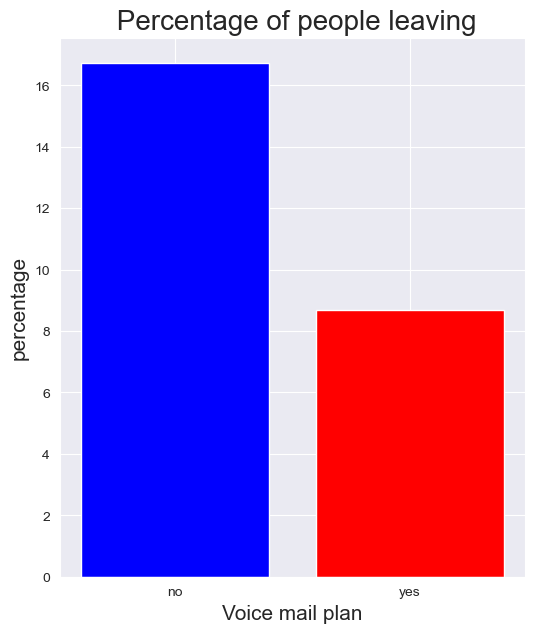

In [68]:
# Vizualizing code for customers churning while having voice mail plan
plt.rcParams['figure.figsize'] = (6, 7)

cc1=list(['no','yes'])
cc2=df.groupby('Voice mail plan')['Churn'].mean()*100
plt.bar(cc1,cc2, color=['b','r'])

plt.title(" Percentage of people leaving", fontsize = 20)
plt.xlabel('Voice mail plan', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

**VOICE MAIL**

2411 dont have a voice mail plan

922 have a voice mail plan

Among those who dont have a voice mail 16.7 % people churn.

Whereas among those who have a voice mail plan only 8.7 % people churn.

**Hypothesis Based on Voice Mail**
* Customers sending less number of voicemails either as per their Requirement or There would be less Network Stability at that place for which they won't be able to send the voice message successfully.

***Customers  with the Voice Mail Plan tend to churn less frequently ***

Voice mail plan doesn't have that much impact in business untill the hypothesis has been proven. If the hypothesis remains true, we need to take care of the respective states where there is less network stability or the states the towers needs either maintainance or new towers should be installed.

voice mail plan might be considered partially.

#### Chart - 7- Overall Calls (Bivariate)

In [69]:
# Chart - 7 visualization code
# Geeting means of churn vs total day calls, total day minutes, total day charge
print(df.groupby(["Churn"])['Total day calls'].mean())
print(" ")
print(df.groupby(["Churn"])['Total day minutes'].mean())
print(" ")
print(df.groupby(["Churn"])['Total day charge'].mean())

# 18% more min    18% more charge    no insight

Churn
False    100.283158
True     101.335404
Name: Total day calls, dtype: float64
 
Churn
False    175.175754
True     206.914079
Name: Total day minutes, dtype: float64
 
Churn
False    29.780421
True     35.175921
Name: Total day charge, dtype: float64


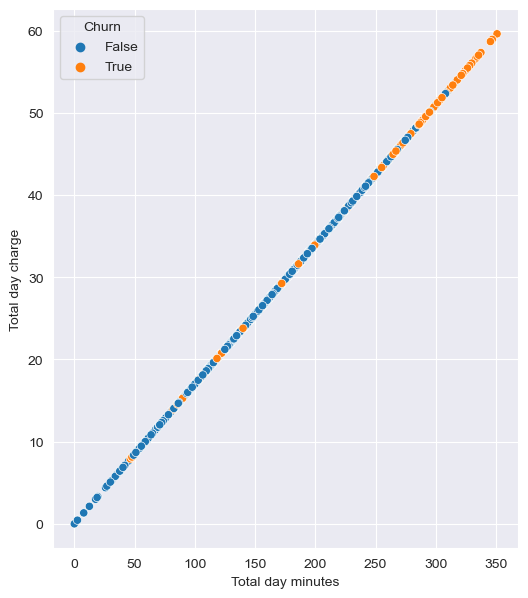

In [70]:
# Vizualizing Total day minutes vs total day charge
cdd = sns.scatterplot(x="Total day minutes", y="Total day charge", hue="Churn", data=df)


In [71]:
# Geeting means of churn vs total eve calls, total eve minutes, total evening charge
print(df.groupby(["Churn"])['Total eve calls'].mean())
print(" ")
print(df.groupby(["Churn"])['Total eve minutes'].mean())
print(" ")
print(df.groupby(["Churn"])['Total eve charge'].mean())

Churn
False    100.038596
True     100.561077
Name: Total eve calls, dtype: float64
 
Churn
False    199.043298
True     212.410145
Name: Total eve minutes, dtype: float64
 
Churn
False    16.918909
True     18.054969
Name: Total eve charge, dtype: float64


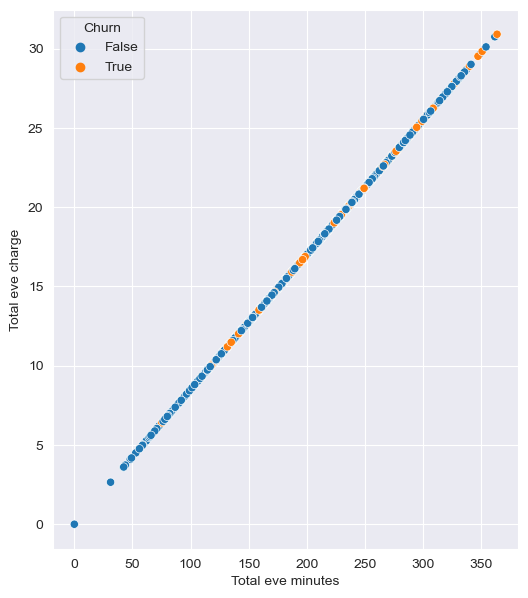

In [72]:
# Vizualizing total evening minutes vs total evening charge
cdd = sns.scatterplot(x="Total eve minutes", y="Total eve charge", hue="Churn", data=df)

In [73]:
# Getting means of churn vs total night calls, total m=night minutes, total night charge
print(df.groupby(["Churn"])['Total night calls'].mean())
print(" ")
print(df.groupby(["Churn"])['Total night minutes'].mean())
print(" ")
print(df.groupby(["Churn"])['Total night charge'].mean())

Churn
False    100.058246
True     100.399586
Name: Total night calls, dtype: float64
 
Churn
False    200.133193
True     205.231677
Name: Total night minutes, dtype: float64
 
Churn
False    9.006074
True     9.235528
Name: Total night charge, dtype: float64


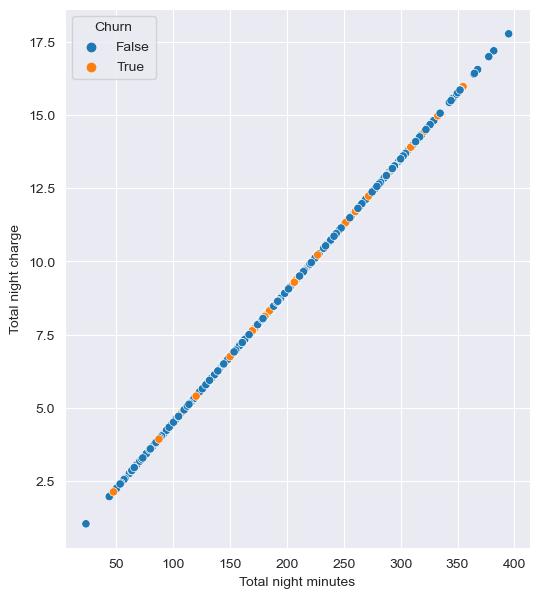

In [74]:
# Vizualizing Total nights minutes vs total night charge
cdd = sns.scatterplot(x="Total night minutes", y="Total night charge", hue="Churn", data=df)

**OVERALL CALLS**

Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

For telecom service provider calling and messaging are two essential product plans. Thus, optimizing voice call plans will definitely create a business impact. Those who are using just calling service must be provided som additional offers either in talktime or powerplus plan. Those who use voice call plan for night only, we might offer some exciting plans from midnight 12 to morning 6. For customers those who have higher accout length should be provided exciting offers as they are our loyal customers. churning of higher account length customer will have a negative impact on business.


#### Chart - 8 - Customer Service Calls (Bivariate)

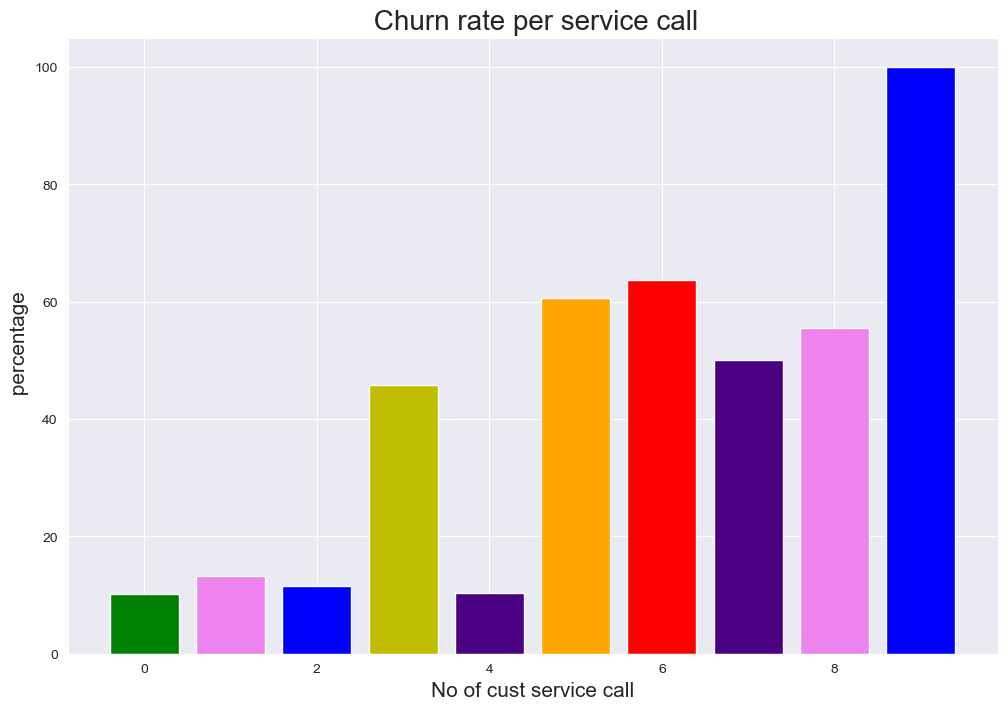

In [75]:
# Chart - 8 visualization code
# Visualizing churn rate per customer service calls
plt.rcParams['figure.figsize'] = (12, 8)


s1=list(df['Customer service calls'].unique())
s2=list(df.groupby(['Customer service calls'])['Churn'].mean()*100)
plt.bar(s1,s2, color = ['violet','indigo','b','g','y','orange','r'])


plt.title(" Churn rate per service call", fontsize = 20)
plt.xlabel('No of cust service call', fontsize = 15)
plt.ylabel(' percentage', fontsize = 15)
plt.show()


**CUSTOMER SERVICE CALL**

The service calls of customers varies from 0 to 9 . 

Those customers who make more service calls they have a high probability of leaving.

As we can see from graph , customers with more then 5 service calls their probability of leaving is more then 50 %.

Hence customers who make more then 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

Customer service is an essential factor for every business. SO definitely good customer service will have a positive impact to the business. We have to look afted the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone.
Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

#### Chart - 9 - Column wise Histogram & Box Plot Univariate Analysis

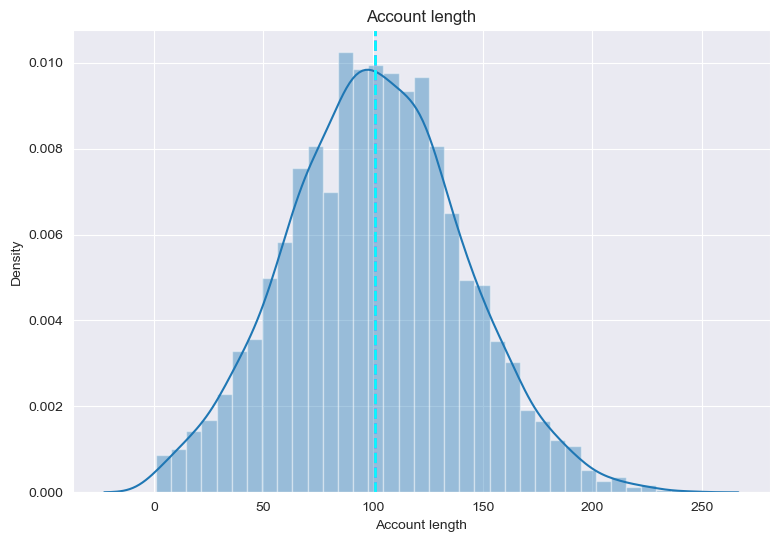

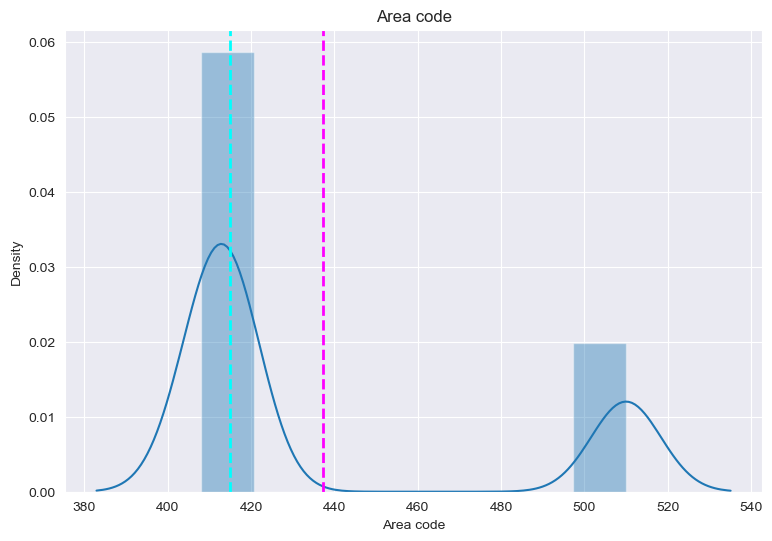

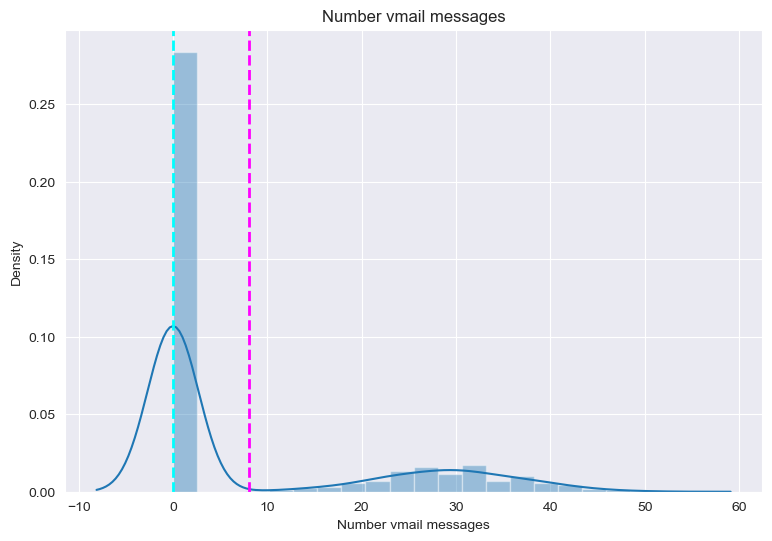

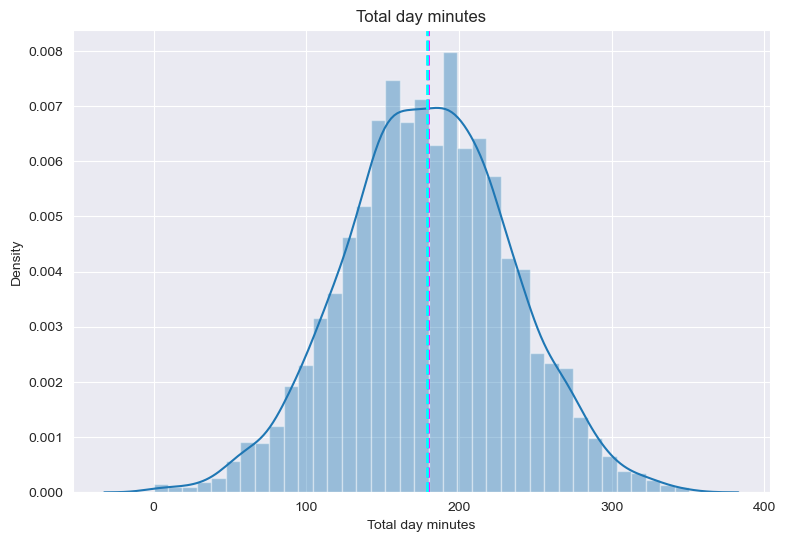

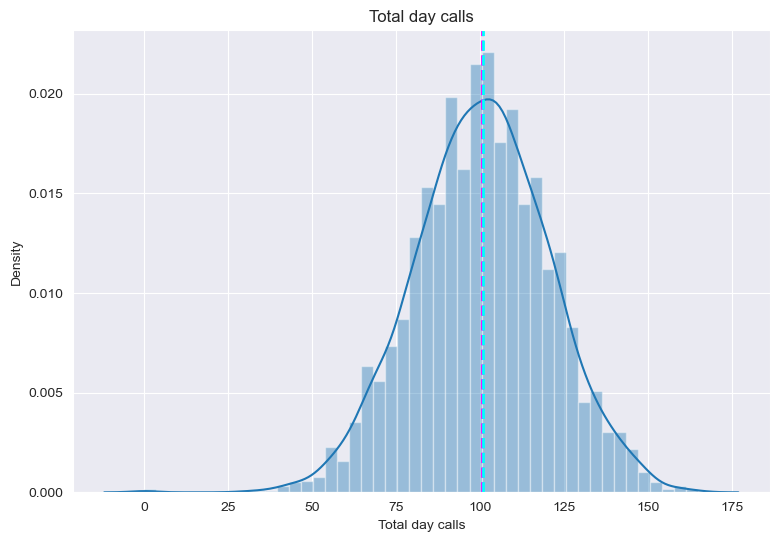

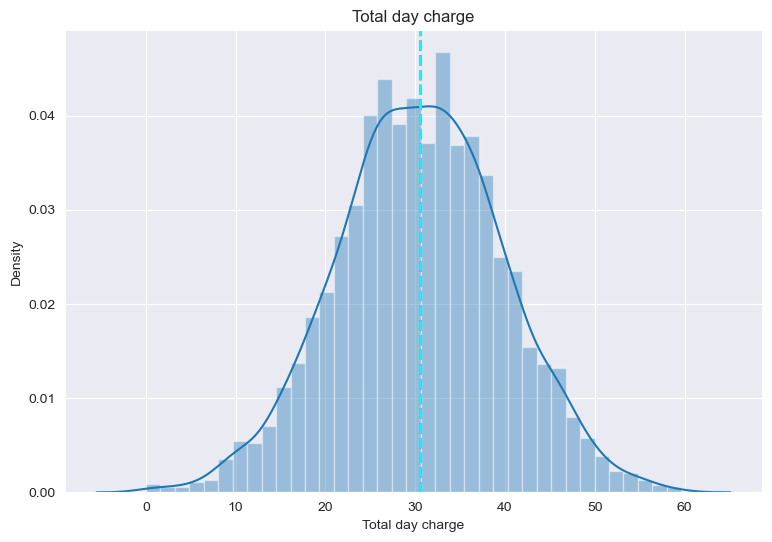

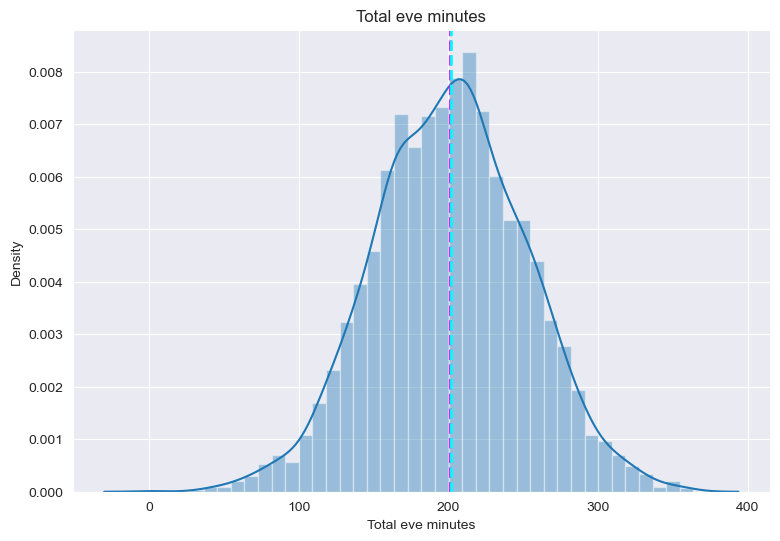

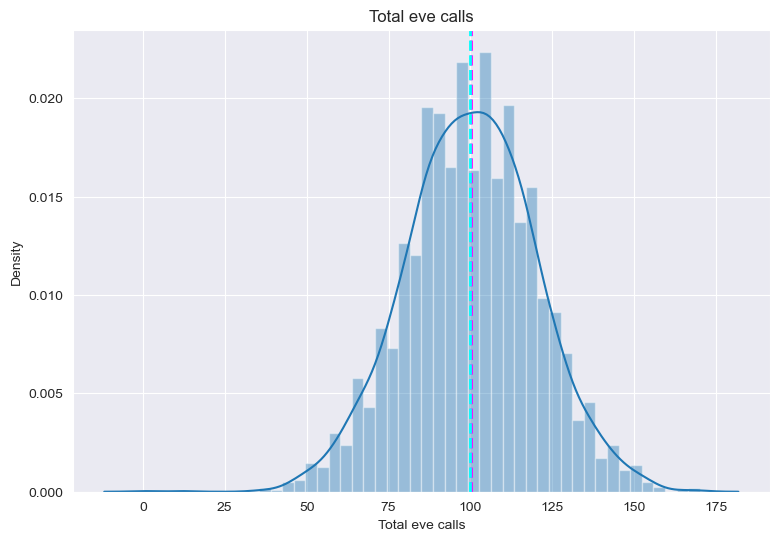

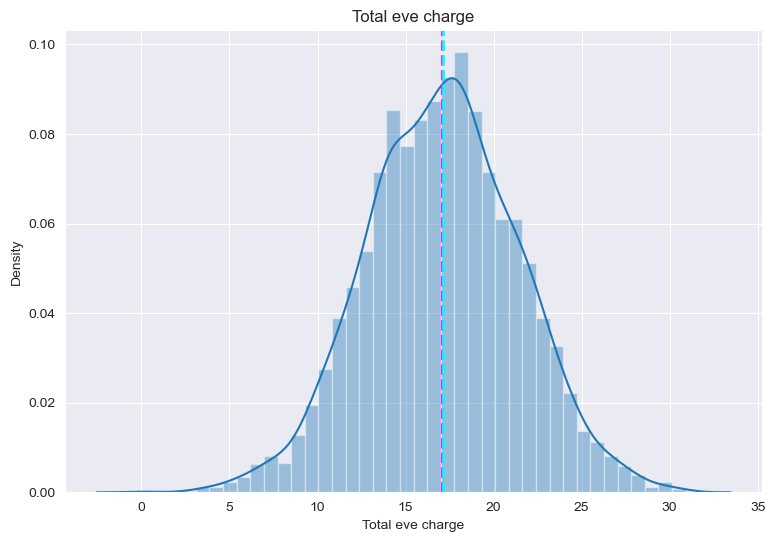

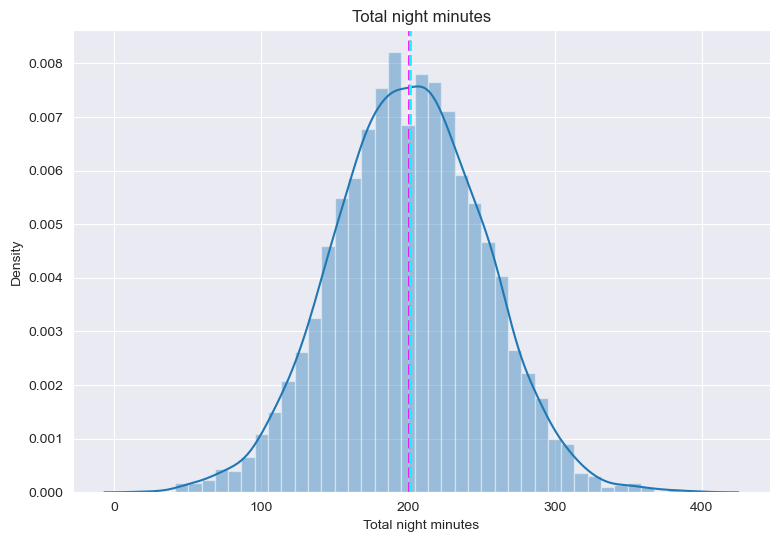

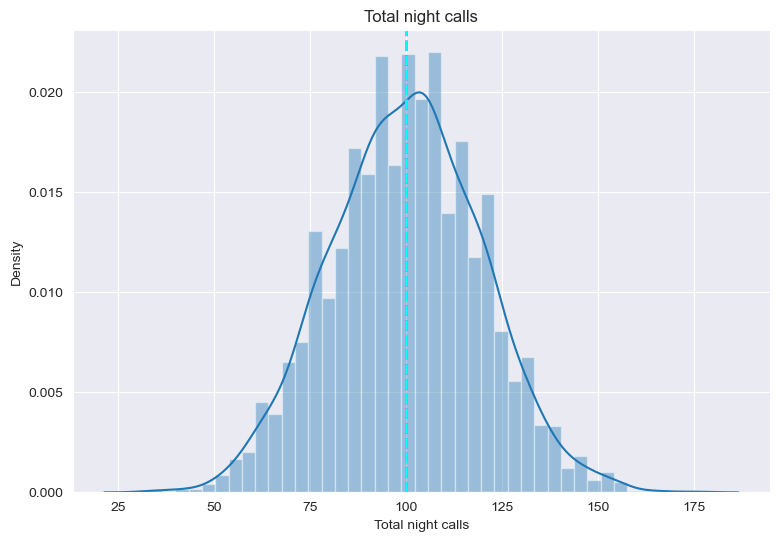

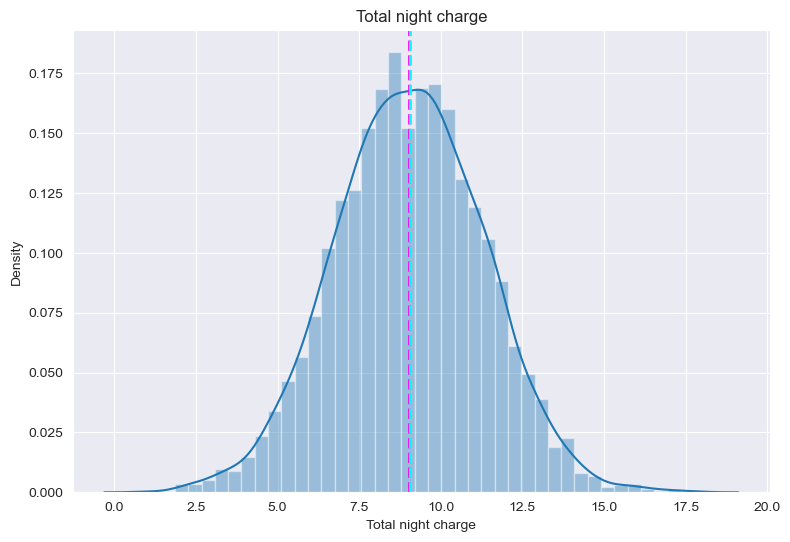

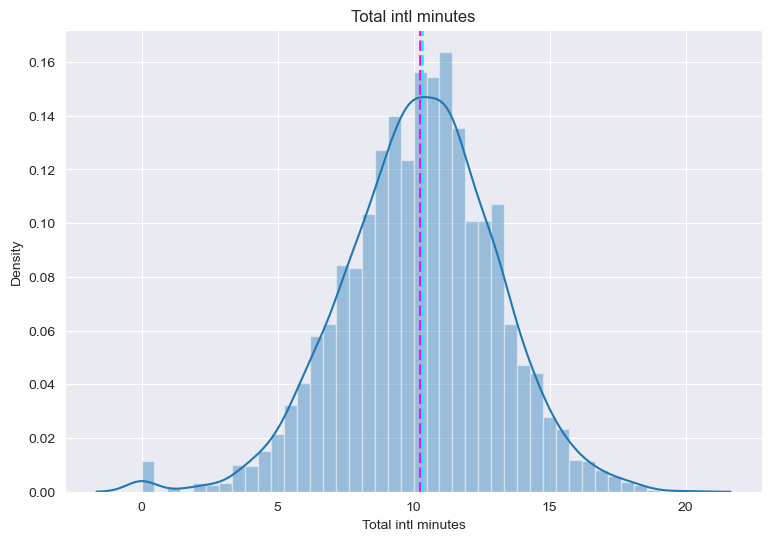

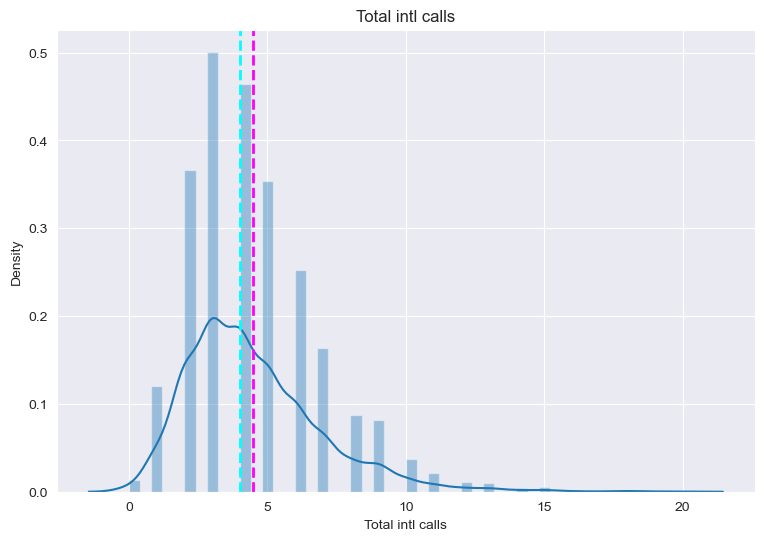

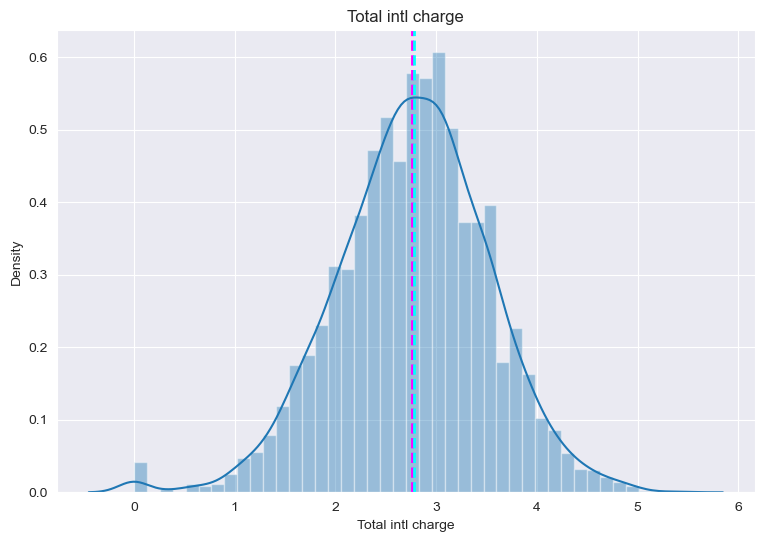

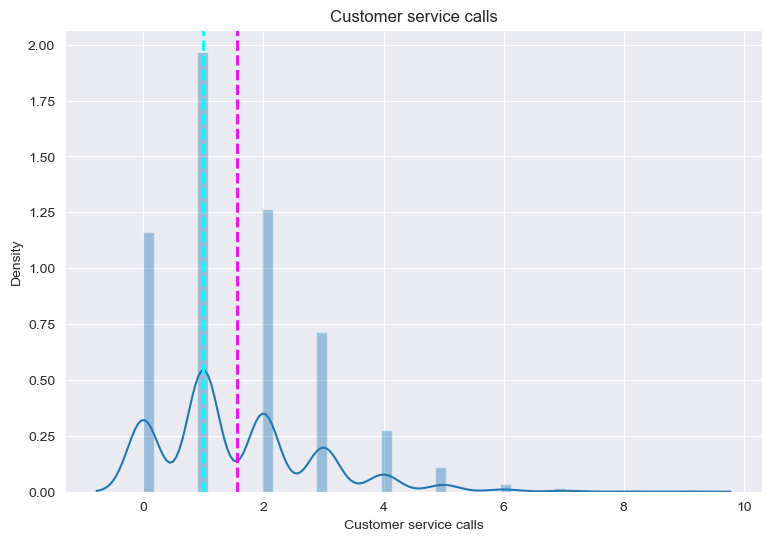

In [76]:
# Chart - 9 visualization code
# Visualizing code of hist plot for each columns to know the data distibution
for col in df.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

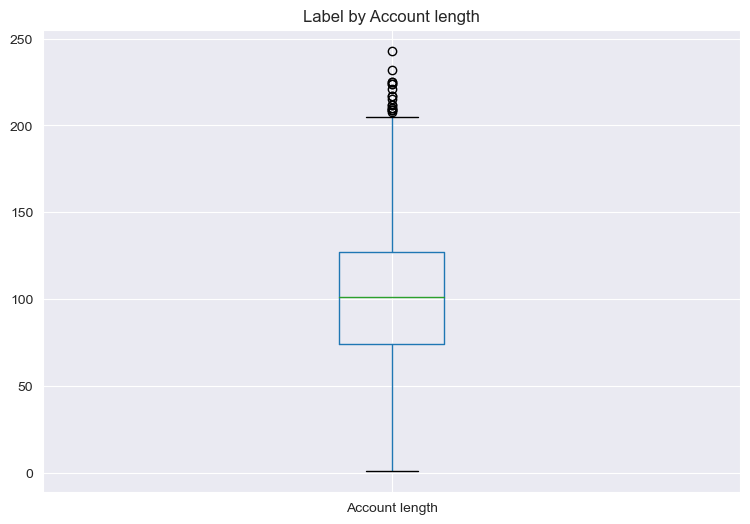

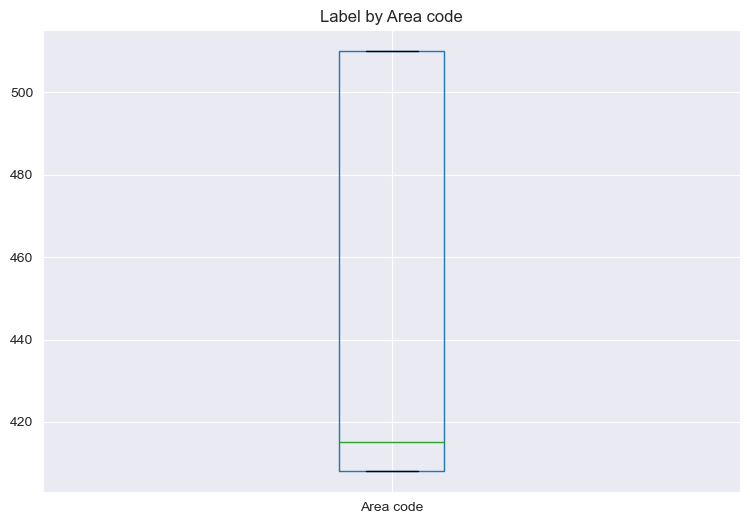

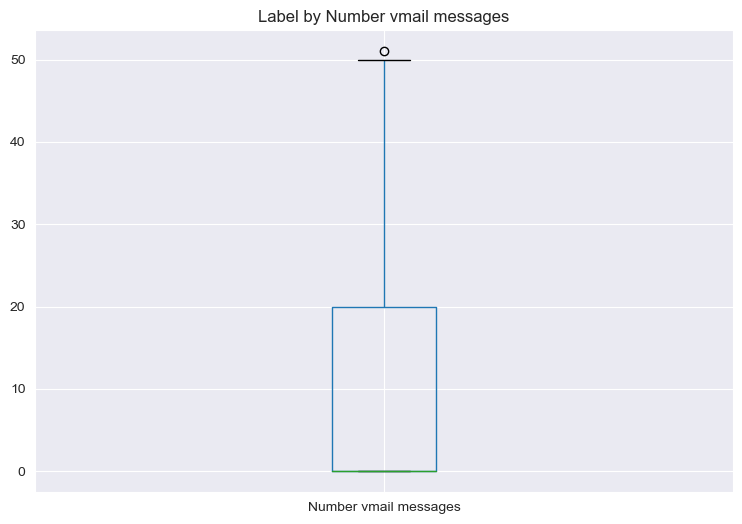

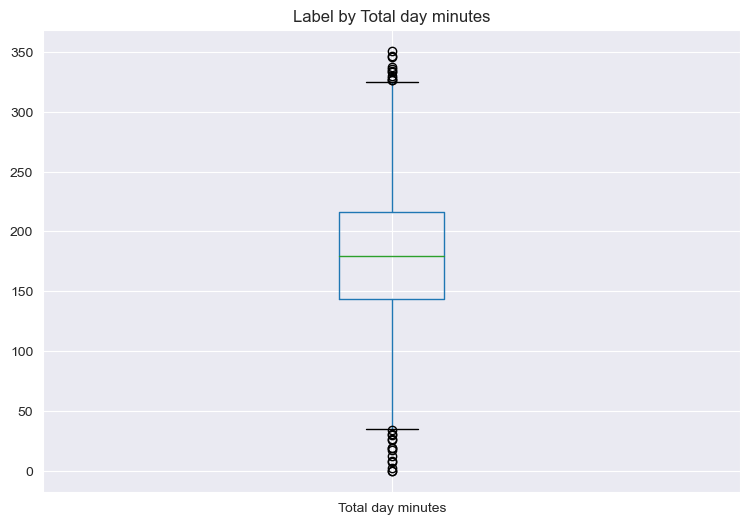

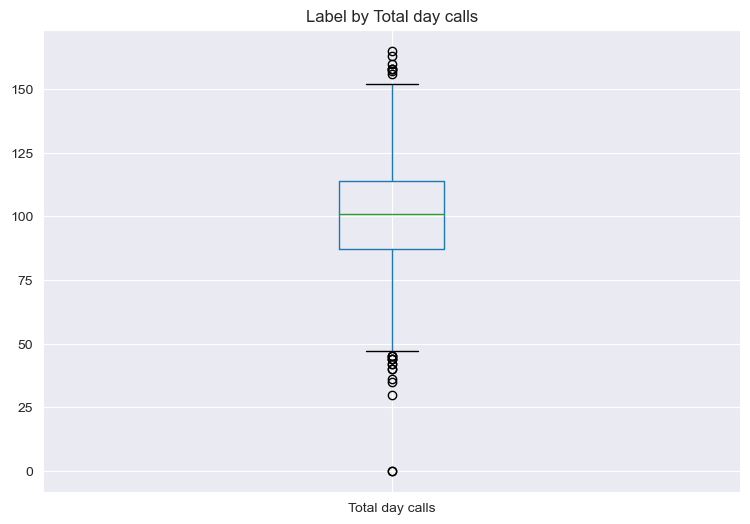

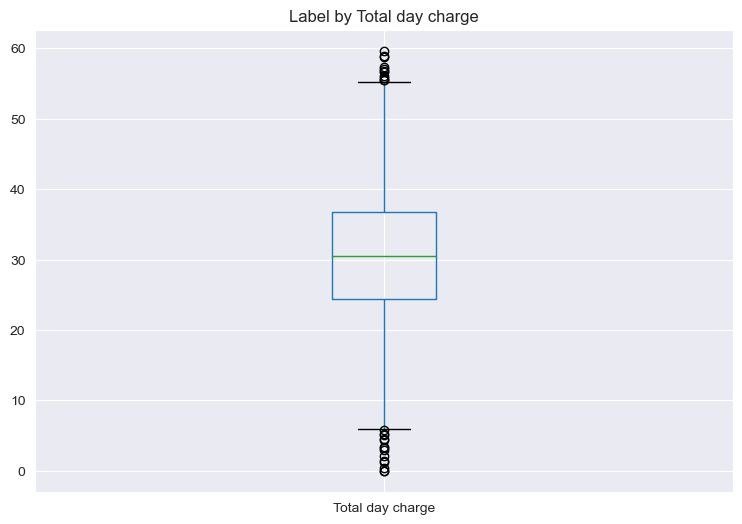

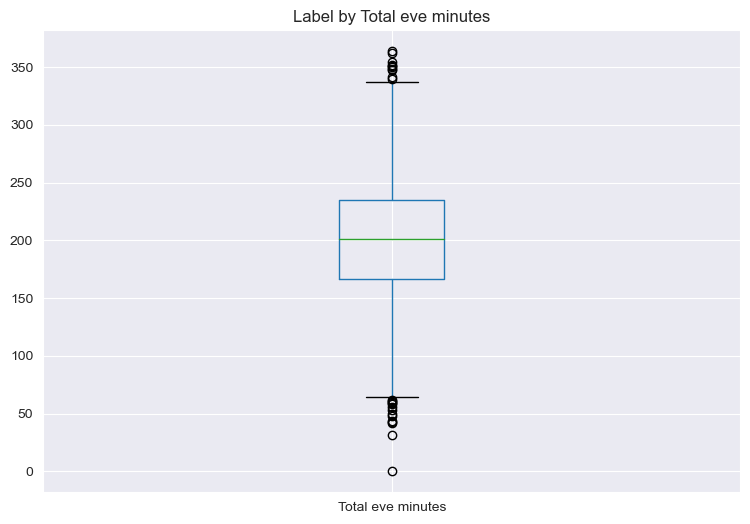

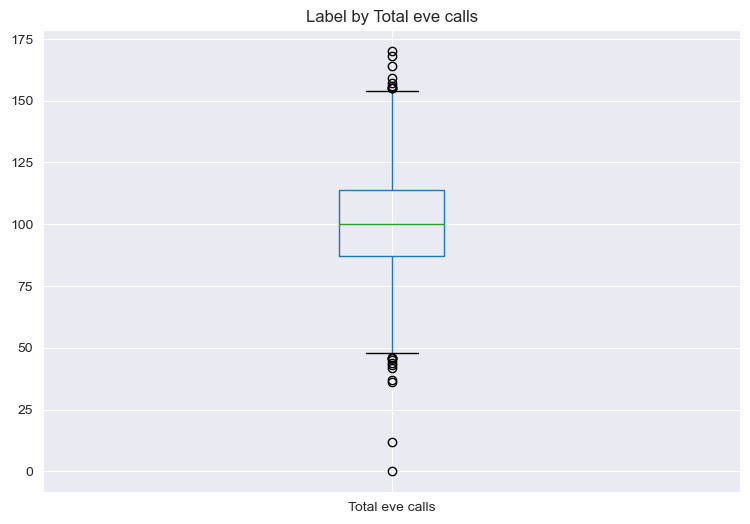

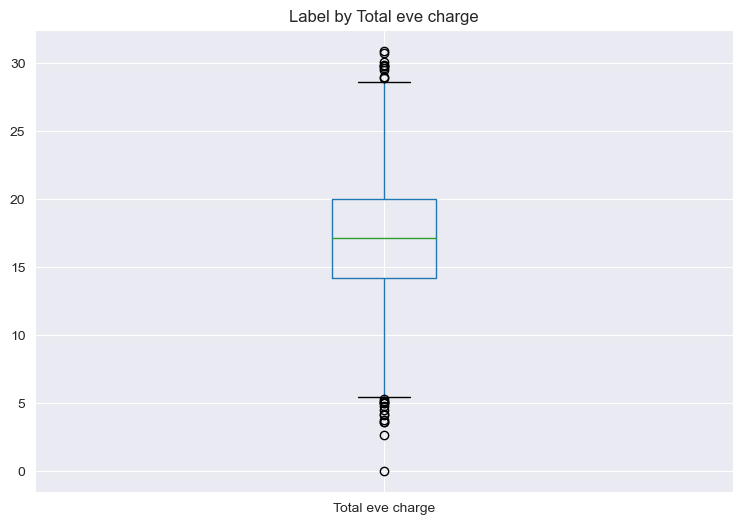

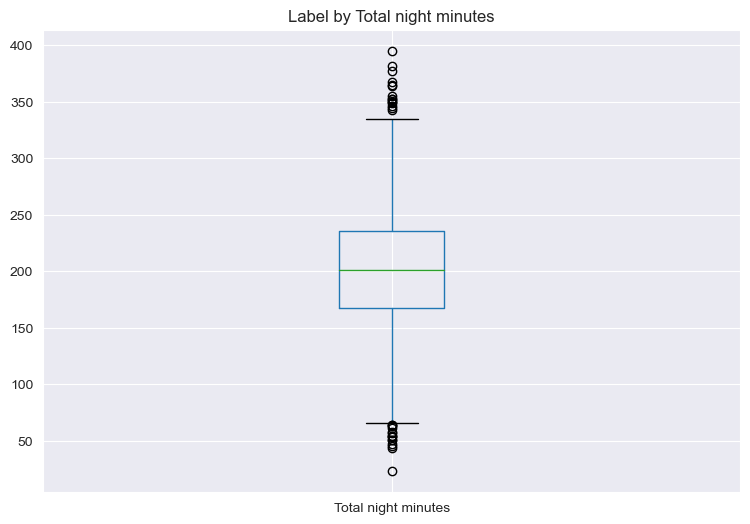

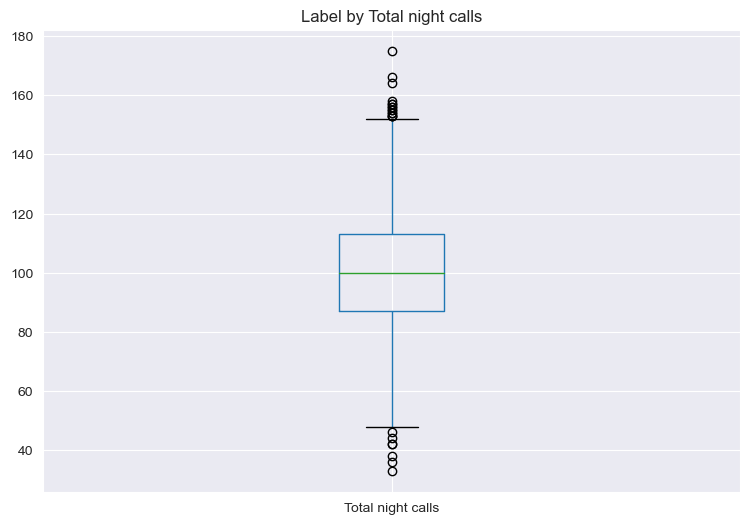

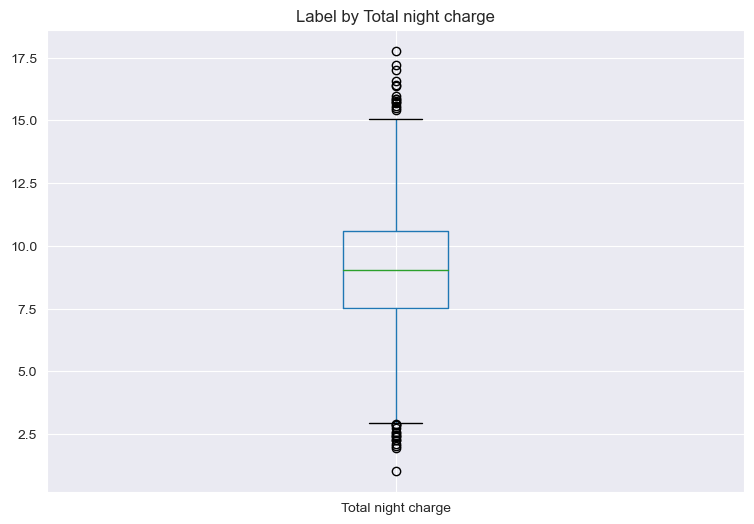

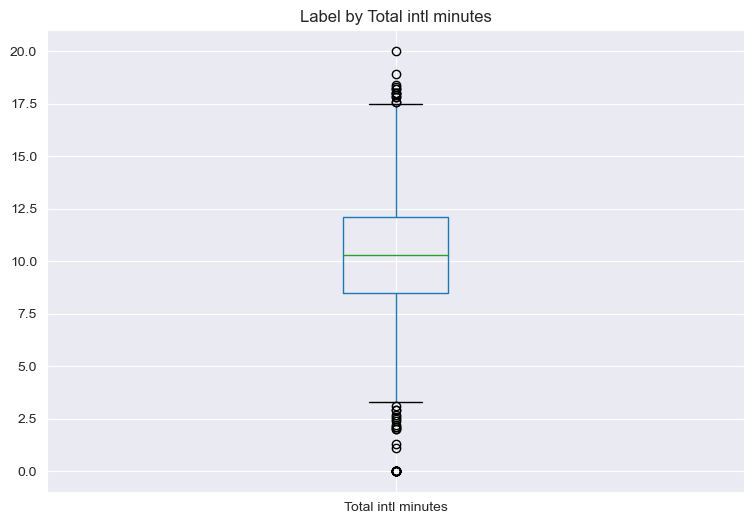

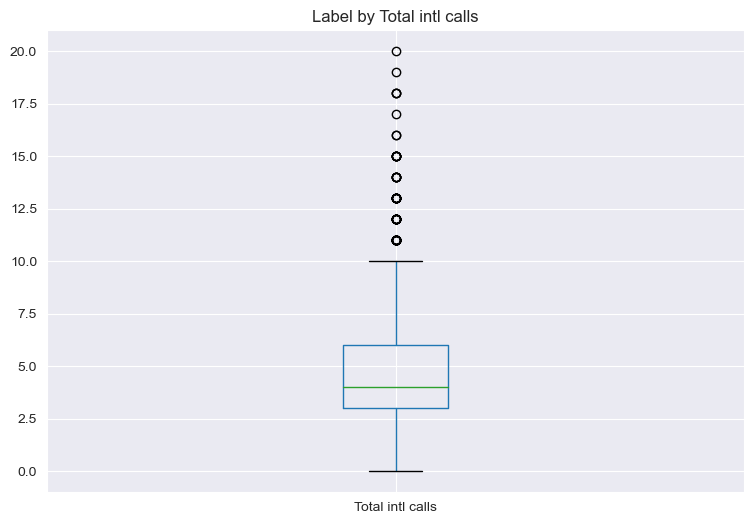

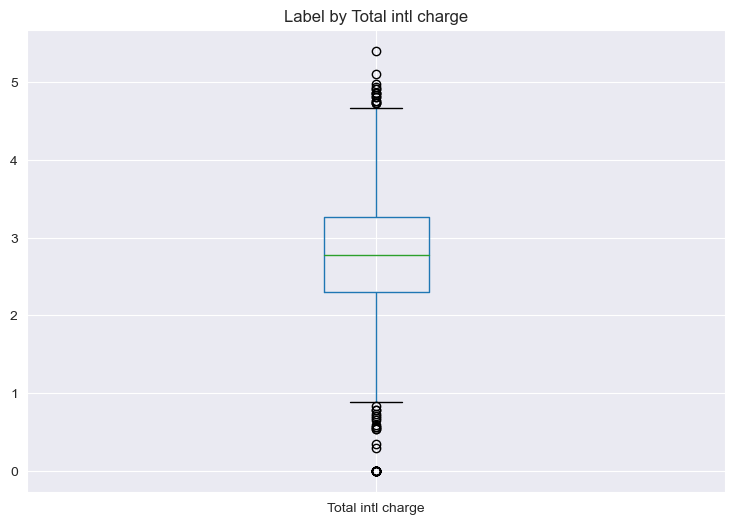

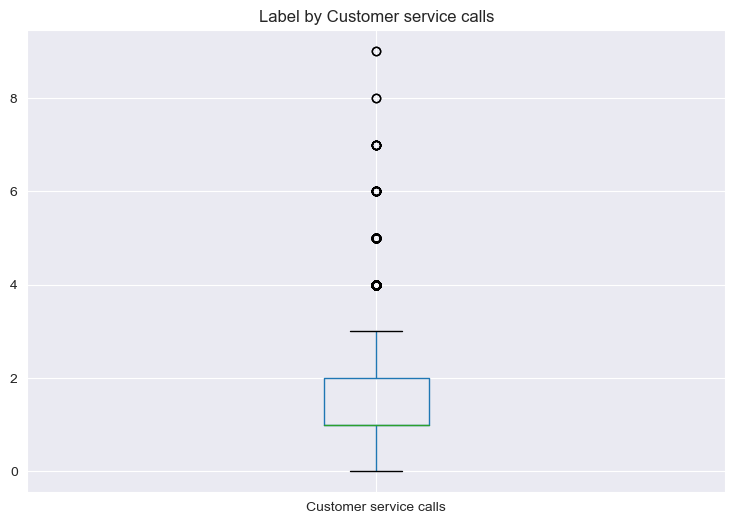

In [77]:
# Visualizing code of box plot for each columns to know the data distibution
for col in df.describe().columns:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot( col, ax = ax)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()


Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 10 - Correlation Heatmap

In [78]:
df_numeric = df.select_dtypes(include=[float, int])

In [79]:
# Correlation Heatmap visualization code
corr = df_numeric.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

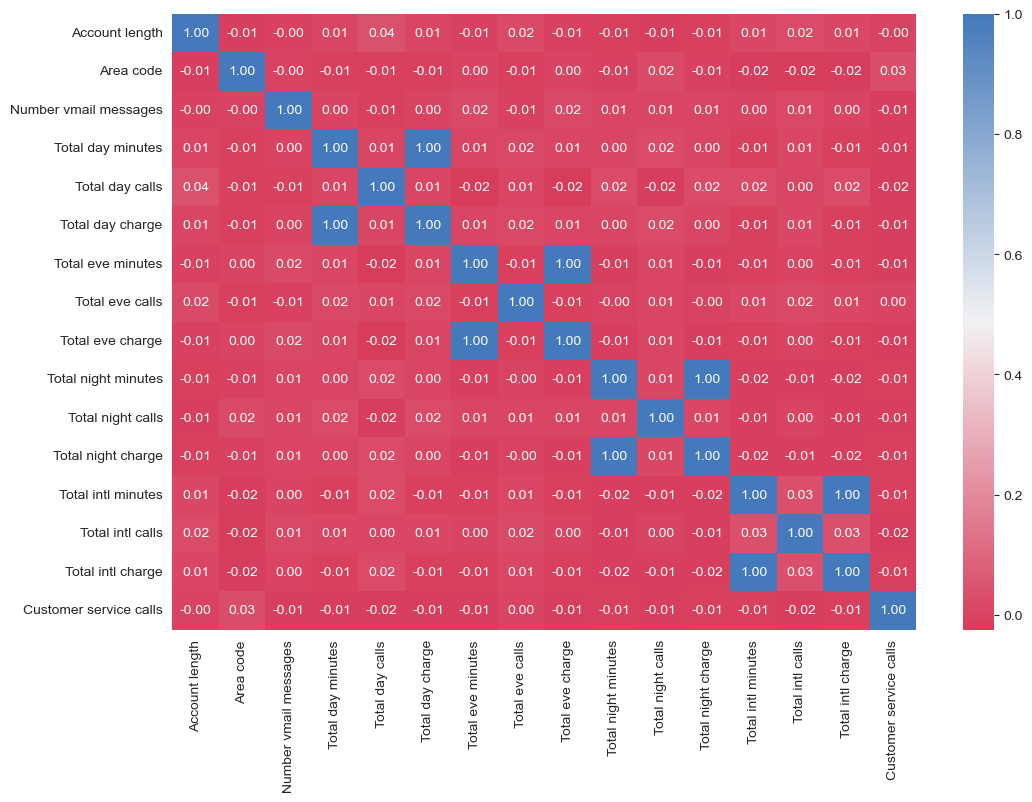

In [80]:
# Create a heatmap for visualization 
cmap = sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.show()

From the above correlation heatmap, we can see total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute are positiveliy highly correlated with a value of 1.

Customer service call is positively correlated only with area code and negative correlated with rest variables.

Rest all correlation can be depicted from the above chart.


## ***5. Feature Engineering & Data Pre-processing***

In [119]:
# Creating a copy of the dataset for further feature engineering
df1=df.copy()

In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

#### Handling Outliers & Outlier treatments

In [121]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in df.describe().columns:
    if abs(df[i].mean()-df[i].median())<0.2:
        symmetric_feature.append(i)
    else:
        non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

# Removing Customer Service Calls column from the list as it's an important factor
# which can't be treated as outliers here will is already leading to higher churn as we have seen furing analysis.
non_symmetric_feature.pop()


Symmetric Distributed Features : - ['Account length', 'Total day charge', 'Total eve calls', 'Total eve charge', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl charge']
Skew Symmetric Distributed Features : - ['Area code', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total night minutes', 'Total intl calls', 'Customer service calls']


'Customer service calls'

In [122]:
# For Symmetric features defining upper and lower boundry
def outlier_treatment(df,feature):
    upper_boundary= df[feature].mean()+3*df[feature].std()
    lower_boundary= df[feature].mean()-3*df[feature].std()
    return upper_boundary,lower_boundary

In [123]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
    df1.loc[df[feature]<= outlier_treatment(df=df1,feature=feature)[1], feature]=outlier_treatment(df=df1,feature=feature)[1]
    df1.loc[df[feature]>= outlier_treatment(df=df1,feature=feature)[0], feature]=outlier_treatment(df=df1,feature=feature)[0]

In [124]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
    IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
    lower_bridge =df[feature].quantile(0.25)-3*IQR
    upper_bridge =df[feature].quantile(0.25)+3*IQR
    return upper_bridge,lower_bridge

In [125]:
# Restricting the data to lower and upper boundry
for feature in symmetric_feature:
    df1.loc[df1[feature]<= outlier_treatment(df=df1,feature=feature)[1], feature]=outlier_treatment(df=df1,feature=feature)[1]
    df1.loc[df1[feature]>= outlier_treatment(df=df1,feature=feature)[0], feature]=outlier_treatment(df=df1,feature=feature)[0]

In [126]:
# Restricting the data to lower and upper boundry
for feature in non_symmetric_feature:
    df.loc[df[feature]<= outlier_treatment_skew(df=df1,feature=feature)[1], feature]=outlier_treatment_skew(df=df1,feature=feature)[1]
    df.loc[df[feature]>= outlier_treatment_skew(df=df1,feature=feature)[0], feature]=outlier_treatment_skew(df=df1,feature=feature)[0]

In [127]:
# # After Outlier Treatment showing the dataset distribution using strip plot
# # Visualising  code for the numerical columns 
# for col in df.describe().columns:
#   fig=plt.figure(figsize=(9,6))
#   sns.stripplot(df[col])

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQ. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1.	lower inner fence: Q1–1.5*IQ
2.	upper inner fence: Q3 + 1.5*IQ
3.	lower outer fence: Q1–3*IQ
4.	upper outer fence: Q3 + 3*IQ


### 3. Categorical Encoding

In [129]:
df1.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [130]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   float64
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   float64
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   float64
 14  Total night charge      3333 non-null   

In [131]:
# Encode your categorical columns
# Getting the categorical columns

categorical_columns=list(set(df1.columns.to_list()).difference(set(df1.describe().columns.to_list())))
print("Categorical Columns are :-", categorical_columns)

Categorical Columns are :- ['State', 'Churn', 'International plan', 'Voice mail plan']


In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   float64
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   float64
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   float64
 14  Total night charge      3333 non-null   

In [133]:
# Getting dictionaries for Label Encoding
dict1={True:1,False:0}
dict2={"Yes":1,"No":0}
area_code_list=sorted(list(df1["Area code"].unique()))
dict3=dict(zip(area_code_list,range(0,len(area_code_list))))

In [134]:
# Label Encoding in the dataset
# df['Churn']=df['Churn'].map(dict1)
df1['International plan']=df1['International plan'].map(dict2)
df1['Voice mail plan']=df1['Voice mail plan'].map(dict2)
df1['Area code']=df['Area code'].map(dict3)

In [135]:
# One Hot Encoding on State Column
df1=pd.get_dummies(df1,drop_first= True)

In [136]:
df1["Churn"]

0       False
1        True
2        True
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Name: Churn, Length: 3333, dtype: bool

I have used Label Encoding technique for Churn, Area Code, Voice Mail & International Plan column and One Hot Encoding for State Column. As we have seen during analysis, that State date is very very important and we also created some hypothesis based on our logics that there are some states which have poor network issues or maintainence needed there. So, We can ignore the State Column. Thus One hot encoded on that column, and for rest categorical columns, I have used label encoding, because there are only 2-3 unique values in each column which needed to be encoded.

### Feature Manipulation & Selection

In [137]:
df1.isna().sum().sum()

0

In [138]:
# Manipulate Features to minimize feature correlation and create new features
# Creating call duration column for customers with no international plan
df1['Days_1call_duration']=df1['Total day minutes']/df1['Total day calls']
df1['intern_1call_duration']=df1['Total intl minutes']/df1['Total intl calls']

df1['evening_1call_duration']=df1['Total eve minutes']/df1['Total eve calls']
df1['night_1call_duration']=df1['Total night minutes']/df1['Total night calls']

# Creating price rate per minute column for customers with international plan
df1['international_rate_per_min']=df['Total intl charge']/df1['Total intl minutes']
df1['day_rate_per_min']=df1['Total day charge']/df1['Total day minutes']
df1['eve_rate_per_min']=df1['Total eve charge']/df1['Total eve minutes']
df1['night_rate_per_min']=df1['Total night charge']/df1['Total night minutes']


In [139]:
np.isinf(df1).values.sum()
df1.replace([np.inf, -np.inf], 0, inplace=True)

In [140]:
df1.isna().sum().sum()

0

Created Some new features like Call duration and call charges for all day, evening, night and international calls.

####  Feature Selection

In [141]:
# Checking the shape of dataset
df1.shape

(3333, 77)

In [142]:
# Dropping Constant and Quasi Constant Feature
from  sklearn.feature_selection import VarianceThreshold
def dropping_constant(data):
    var_thres= VarianceThreshold(threshold=0.05)
    var_thres.fit(data)
    concol = [column for column in data.columns 
          if column not in data.columns[var_thres.get_support()]]
    if "Churn" in concol:
        concol.remove("Churn")
    else:
        pass
    df_removed_var=data.drop(concol,axis=1)
    return df_removed_var 

In [143]:
# Calling the function
df_removed_var=dropping_constant(df1)

In [144]:
df_removed_var.isna().sum()

Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
Days_1call_duration       0
intern_1call_duration     0
evening_1call_duration    0
night_1call_duration      0
dtype: int64

In [145]:
# Checking the shape after feature dropped
df_removed_var.shape

(3333, 23)

In [146]:
# Getting important column names
df_columns_required=df.columns.to_list()[1:-1]
df_columns_required.extend(['Days_1call_duration','intern_1call_duration','evening_1call_duration','night_1call_duration','international_rate_per_min','day_rate_per_min','eve_rate_per_min','night_rate_per_min'])

In [147]:
# Correlation Heatmap visualization code
corr = df_removed_var.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

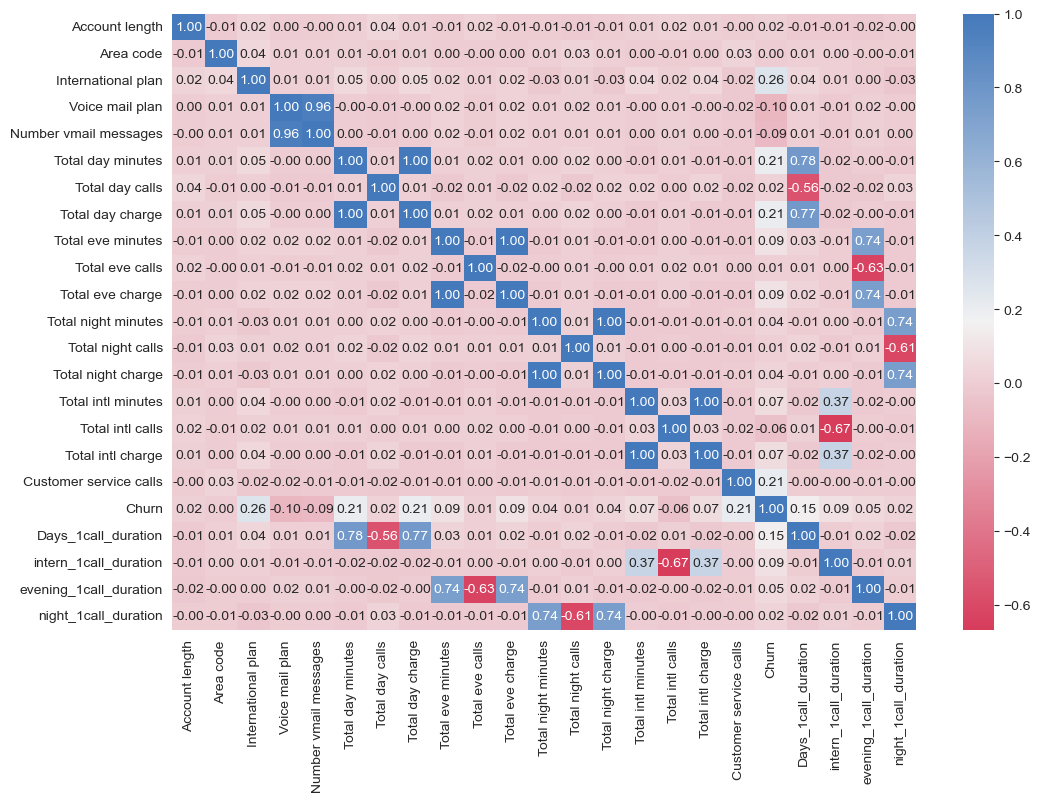

In [148]:
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.show()

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df_removed is your DataFrame with independent variables
X = df_removed_var.copy()

# Ensure only numeric columns are included
X = X.select_dtypes(include=[np.number])

# Handle missing values by filling them with the mean of the respective columns
X = X.fillna(X.mean())

# Replace infinite values with NaN and then fill these NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.mean())

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print features with VIF >= 8
for i in range(len(vif_data)):
    if vif_data.loc[i, "VIF"] >= 8:
        print(vif_data.loc[i, "feature"])

# Display the VIF data
print(vif_data)


Voice mail plan
Number vmail messages
Total day minutes
Total day calls
Total day charge
Total eve minutes
Total eve calls
Total eve charge
Total night minutes
Total night calls
Total night charge
Total intl minutes
Total intl calls
Total intl charge
Days_1call_duration
evening_1call_duration
night_1call_duration
                   feature         VIF
0           Account length        7.41
1                Area code        3.00
2       International plan        1.12
3          Voice mail plan       16.47
4    Number vmail messages       16.08
5        Total day minutes   125322.50
6          Total day calls      102.71
7         Total day charge   124544.18
8        Total eve minutes    48180.34
9          Total eve calls      123.48
10        Total eve charge    47922.14
11     Total night minutes    58071.29
12       Total night calls      128.41
13      Total night charge    58346.69
14      Total intl minutes  1002701.51
15        Total intl calls        9.71
16       Total intl ch

In [150]:
# Check Feature Correlation and finding multicolinearity
def correlation(df,threshold):
    col_corr=set()
    corr_matrix= df.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)



In [151]:
# Getting multicolinear columns and dropping them 
highly_correlated_columns=correlation(df_removed_var,0.5)

if "Churn" in highly_correlated_columns:
    highly_correlated_columns.remove("Churn")
else:
    pass
  
df_removed=df_removed_var.drop(highly_correlated_columns,axis=1)
df_removed.shape

(3333, 14)

In [152]:
df_removed.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Total day minutes', 'Total day calls', 'Total eve minutes',
       'Total eve calls', 'Total night minutes', 'Total night calls',
       'Total intl minutes', 'Total intl calls', 'Customer service calls',
       'Churn'],
      dtype='object')

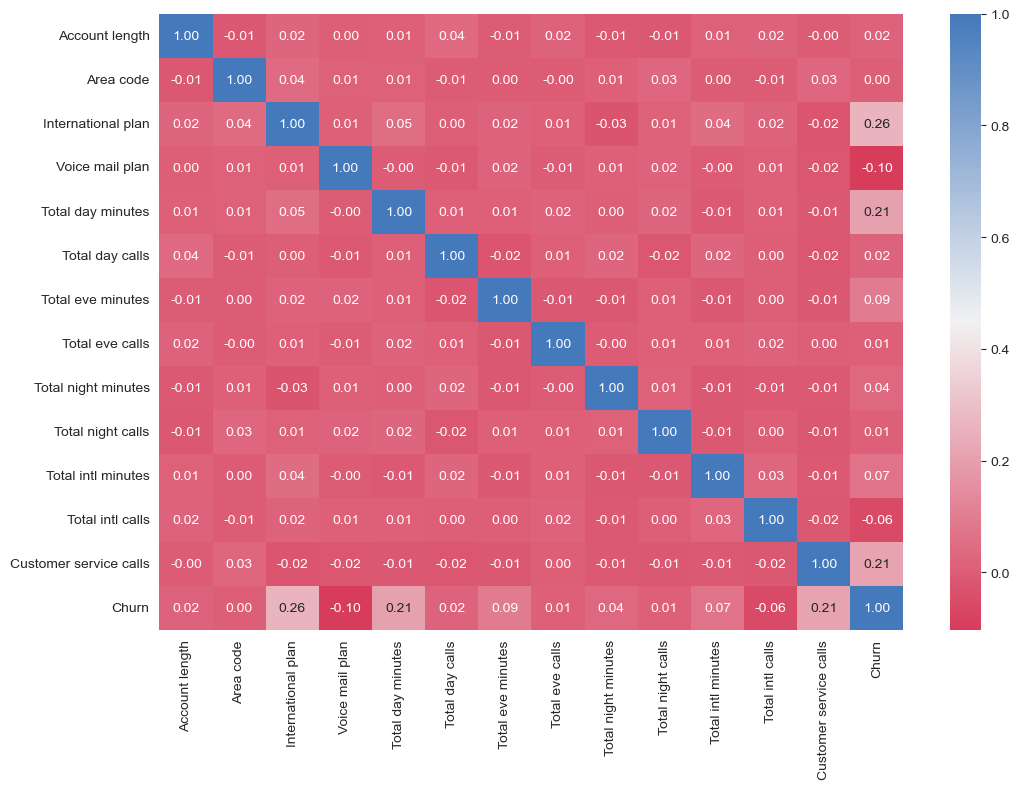

In [153]:
# Correlation after dropping the required columns
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.show()

In [154]:
# Manipulate Features to minimize feature correlation and create new features
# Creating call duration column for customers with no international plan
df_removed['Days_1call_duration']=df_removed['Total day minutes']/df_removed['Total day calls']
df_removed['intern_1call_duration']=df_removed['Total intl minutes']/df_removed['Total intl calls']

df_removed['evening_1call_duration']=df_removed['Total eve minutes']/df_removed['Total eve calls']
df_removed['night_1call_duration']=df_removed['Total night minutes']/df_removed['Total night calls']

df_removed.drop(['Total day minutes','Total day calls','Total intl minutes','Total intl calls','Total eve minutes','Total eve calls','Total night minutes','Total night calls'],axis=1,inplace=True)

In [155]:
# Replacing Infinite and null values
np.isinf(df_removed).values.sum()
df_removed.replace([np.inf, -np.inf], 0, inplace=True)

In [156]:
df_removed.shape

(3333, 10)

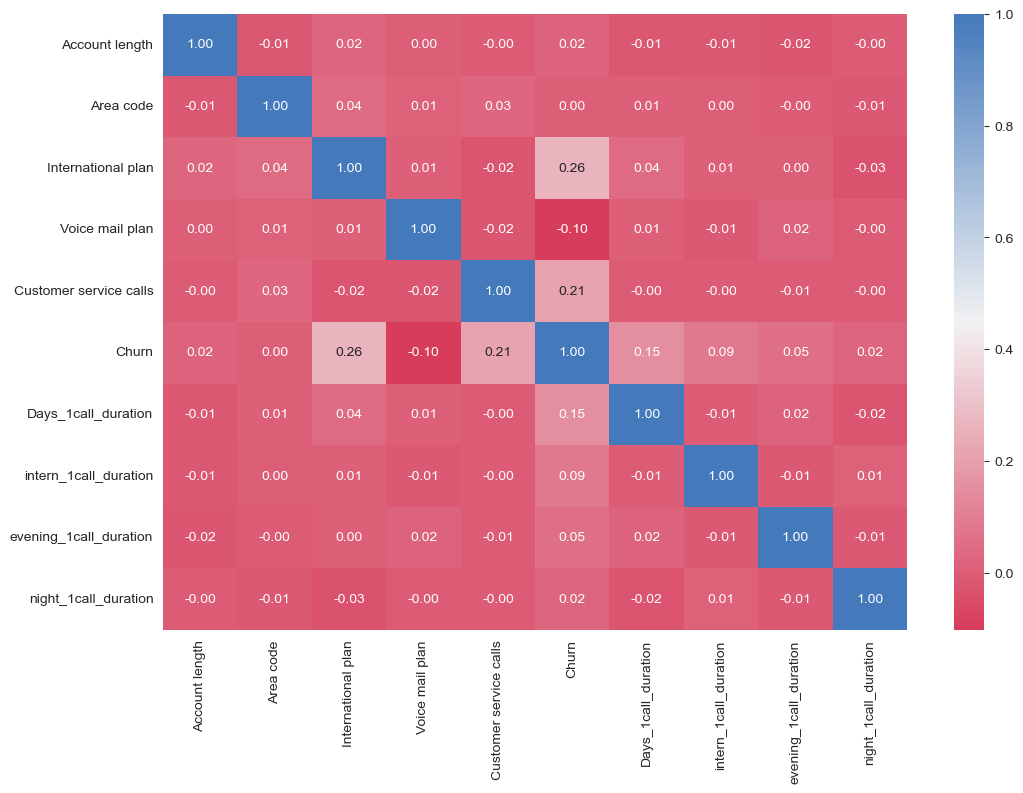

In [157]:
# Checking correlation between new manipulated features
# Correlation Heatmap visualization code
corr = df_removed.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f")
plt.show()

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming df_removed is your DataFrame with independent variables
X = df_removed.copy()

# Ensure only numeric columns are included
X = X.select_dtypes(include=[np.number])

# Handle missing values by filling them with the mean of the respective columns
X = X.fillna(X.mean())

# Replace infinite values with NaN and then fill these NaNs
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = X.fillna(X.mean())

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Round VIF values to 2 decimal places
vif_data["VIF"] = vif_data["VIF"].round(2)

# Print features with VIF >= 8
for i in range(len(vif_data)):
    if vif_data.loc[i, "VIF"] >= 8:
        print(vif_data.loc[i, "feature"])

# Display the VIF data
print(vif_data)


                  feature   VIF
0          Account length  6.05
1               Area code  2.84
2      International plan  1.11
3         Voice mail plan  1.37
4  Customer service calls  2.32
5     Days_1call_duration  6.20
6   intern_1call_duration  2.72
7  evening_1call_duration  7.06
8    night_1call_duration  7.37


In [159]:
df_removed.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Customer service calls', 'Churn', 'Days_1call_duration',
       'intern_1call_duration', 'evening_1call_duration',
       'night_1call_duration'],
      dtype='object')

I used Dropping Constant Feature, Dropping columns having multicolinearity and validate through VIF. 

Feature Selector that removes all low variance features. This feature selection algorithm looks only at the features(X), not the desired outputs(Y), and can be used for unsupported learning.

A Pearson correlation is a number between -1 and 1 that indicates the extent to which two variables are linearly related. The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”

Pearson correlations are suitable only for metric variables The correlation coefficient has values between -1 to 1

• A value closer to 0 implies weaker correlation (exact 0 implying no correlation)

• A value closer to 1 implies stronger positive correlation

• A value closer to -1 implies stronger negative correlation

Collinearity is the state where two variables are highly correlated and contain similar information about the variance within a given dataset. To detect collinearity among variables, simply create a correlation matrix and find variables with large absolute values.

Steps for Implementing VIF

• Calculate the VIF factors.

• Inspect the factors for each predictor variable, if the VIF is between 5–10, multicollinearity is likely present and you should consider dropping the variable.

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

1st I dropped columns having constant or quasi constant variance. Then using pearson corelation I removed the columns having multicolinearity and again validate the VIFs for each feauture and found some features having VIF of more than 5-10 and I considered it to be 8 and again manipulated some features and again dropped multicolinear columns to make the VIF less than 8. The features got decreased from 77 to 10.

In [160]:
# Embedded Method of validating the feature importances of selected features
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  # final_df.plot.bar(color='teal')
  return final_df

In [161]:
df_removed.isna().sum()

Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Customer service calls    0
Churn                     0
Days_1call_duration       0
intern_1call_duration     0
evening_1call_duration    0
night_1call_duration      0
dtype: int64

In [162]:
# Getting feature importance of selected features
randomforest_embedded(x=df_removed.drop(["Churn"],axis=1),y=df["Churn"])

,Features,Importances
3,Voice mail plan,0.026489
1,Area code,0.026880
2,International plan,0.077990
0,Account length,0.111187
8,night_1call_duration,0.121649
7,evening_1call_duration,0.137417
4,Customer service calls,0.141027
6,intern_1call_duration,0.155615
5,Days_1call_duration,0.201747


Finally I found out 9 indepenedent features which are important and valdate their importances through Embedded method using random forest classifier feature importance. All the features which i left with having some importances and none of them are 0. So, It validates the features make sense and heading towards the right direction.

In [163]:
# Transform Your data
# Exponential Transforming the required column
df_removed['intern_1call_duration']=(df_removed['intern_1call_duration'])**0.25
df_removed['evening_1call_duration']=(df_removed['evening_1call_duration'])**0.25
df_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   float64
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Voice mail plan         3333 non-null   int64  
 4   Customer service calls  3333 non-null   int64  
 5   Churn                   3333 non-null   bool   
 6   Days_1call_duration     3333 non-null   float64
 7   intern_1call_duration   3333 non-null   float64
 8   evening_1call_duration  3333 non-null   float64
 9   night_1call_duration    3333 non-null   float64
dtypes: bool(1), float64(5), int64(4)
memory usage: 237.7 KB


In [164]:
# Scaling your data
# Checking the data
df_removed.head()

,Account length,Area code,International plan,Voice mail plan,Customer service calls,Churn,Days_1call_duration,intern_1call_duration,evening_1call_duration,night_1call_duration
0,117.0,0,0,0,1,False,1.902062,1.214409,1.447904,2.397778
1,65.0,1,0,0,4,True,0.942336,1.206183,1.288107,1.881081
2,161.0,1,0,0,4,True,4.968657,0.880112,1.345382,1.254687
3,111.0,1,0,0,2,False,1.071845,1.064351,1.077129,1.805714
4,49.0,2,0,0,1,False,1.019658,1.825285,1.185232,1.985556


In [165]:
# Standardizing the required column
df_removed["Account length"] = StandardScaler().fit_transform(df_removed["Account length"].values.reshape(-1, 1))

In [166]:
# Checking the dataset
df_removed.head()

,Account length,Area code,International plan,Voice mail plan,Customer service calls,Churn,Days_1call_duration,intern_1call_duration,evening_1call_duration,night_1call_duration
0,0.401100,0,0,0,1,False,1.902062,1.214409,1.447904,2.397778
1,-0.906511,1,0,0,4,True,0.942336,1.206183,1.288107,1.881081
2,1.507539,1,0,0,4,True,4.968657,0.880112,1.345382,1.254687
3,0.250222,1,0,0,2,False,1.071845,1.064351,1.077129,1.805714
4,-1.308852,2,0,0,1,False,1.019658,1.825285,1.185232,1.985556


### Data Splitting

In [216]:
X=df_removed.drop("Churn",axis=1)
Y = df_removed["Churn"]

In [169]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split your data to train and test. Choose Splitting ratio wisely.
 # split into 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(df_removed.drop("Churn",axis=1),df_removed["Churn"], test_size = 0.3, random_state = 0)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (2333, 9)
Number transactions y_train dataset:  (2333,)
Number transactions X_test dataset:  (1000, 9)
Number transactions y_test dataset:  (1000,)


### Handling Imbalance Dataset

False    2850
True      483
Name: Churn, dtype: int64
 


<Axes: ylabel='Churn'>

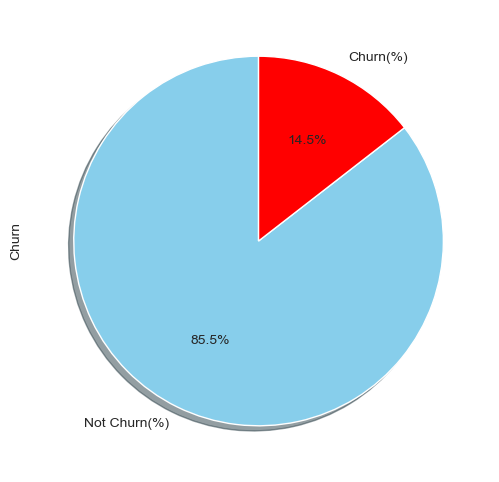

In [170]:
# Chart - 1 visualization code
# Dependant Column Value Counts
print(df.Churn.value_counts())
print(" ")
# Dependant Variable Column Visualization
df['Churn'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Not Churn(%)','Churn(%)'],
                               colors=['skyblue','red'],
                               explode=[0,0]
                              )

## ***6. ML Model Implementation***

### ML Model - - **Implementing Logistic Regression**

In [171]:
# ML Model - 1 Implementation
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
clf.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [172]:
# Checking the coefficients
clf.coef_

array([[ 0.1115706 ,  0.02756805,  2.01189965, -0.76885094,  0.48006074,
         0.56023161,  1.20804563,  1.30957487,  0.13768671]])

In [173]:
# Checking the intercept value
clf.intercept_

array([-7.27399398])

In [174]:
# Predict on the model
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [175]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [176]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8598371195885126
The accuracy on test data is  0.862


[[1942   42]
 [ 285   64]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

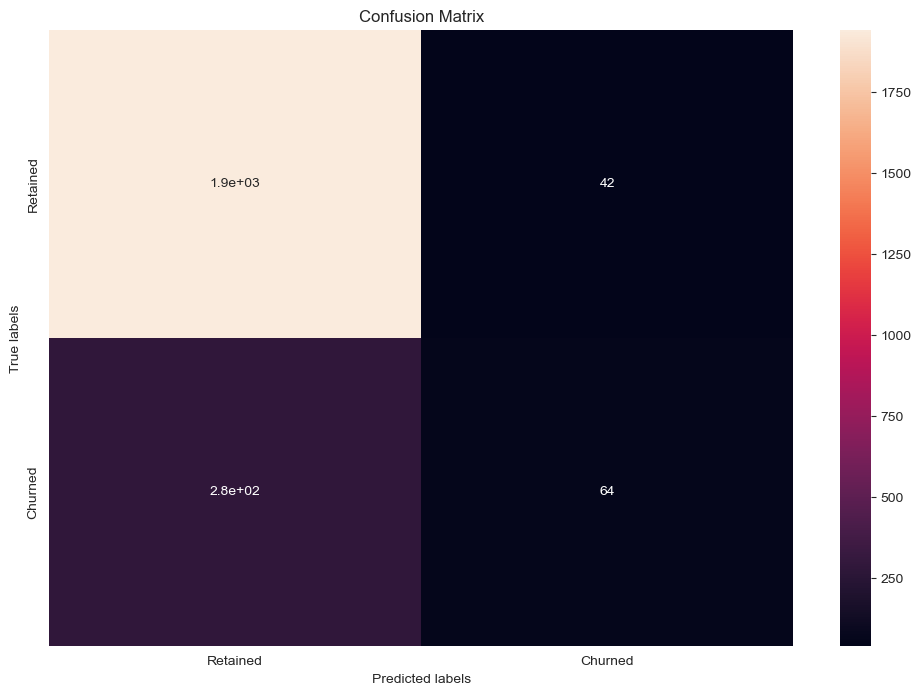

In [177]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[838  28]
 [110  24]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

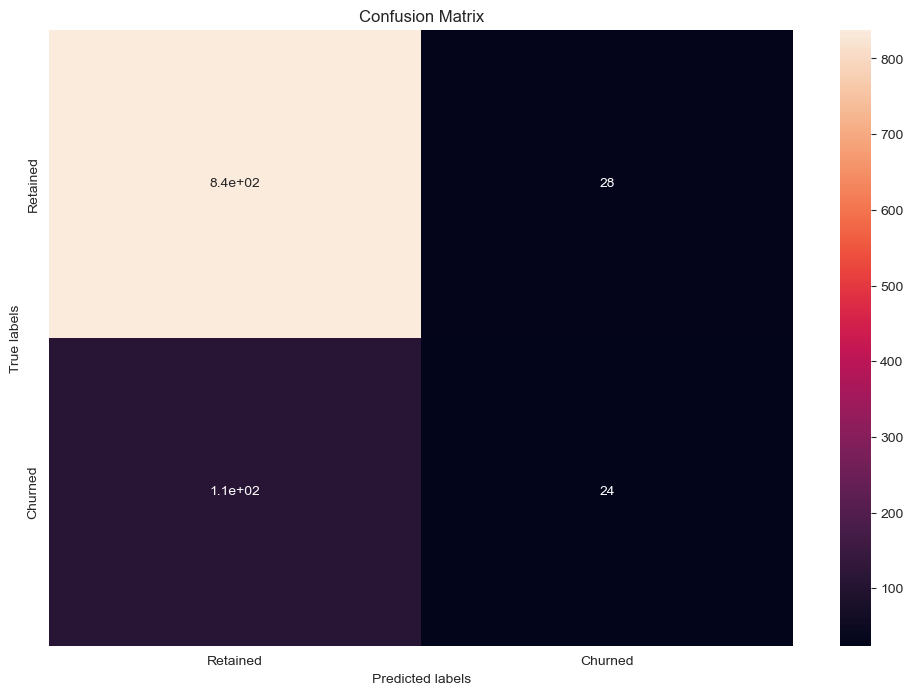

In [178]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [179]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

       False       0.98      0.87      0.92      2227
        True       0.18      0.60      0.28       106

    accuracy                           0.86      2333
   macro avg       0.58      0.74      0.60      2333
weighted avg       0.94      0.86      0.89      2333

 
roc_auc_score
0.5811058669932527


In [180]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

       False       0.97      0.88      0.92       948
        True       0.18      0.46      0.26        52

    accuracy                           0.86      1000
   macro avg       0.57      0.67      0.59      1000
weighted avg       0.93      0.86      0.89      1000

 
roc_auc_score
0.5733859570507739


I used Logistic regression algorithm to create the model. As I got not so good result. 

Next tryting to improving the score by using hyperparameter tuning technique.

#### In Logistic Regression we are getting test accuracy of - 86.2%

### ML Model - 2 - **Implementing Random Forest Classifier**

In [181]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [182]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.905


#### .  it's performance using Evaluation metric Score Chart.

[[1984    0]
 [   0  349]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

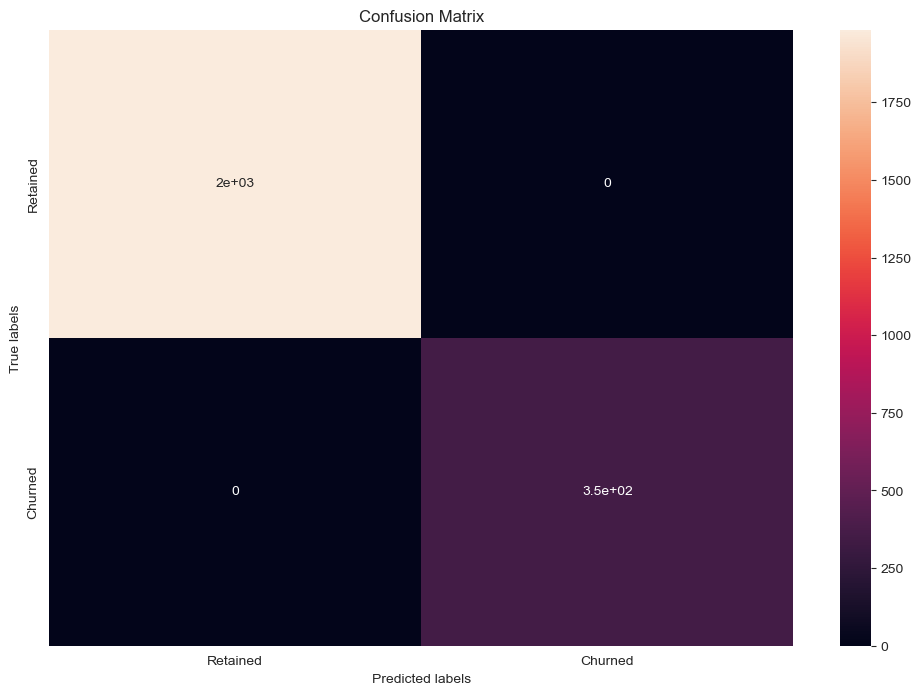

In [183]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[840  26]
 [ 78  56]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

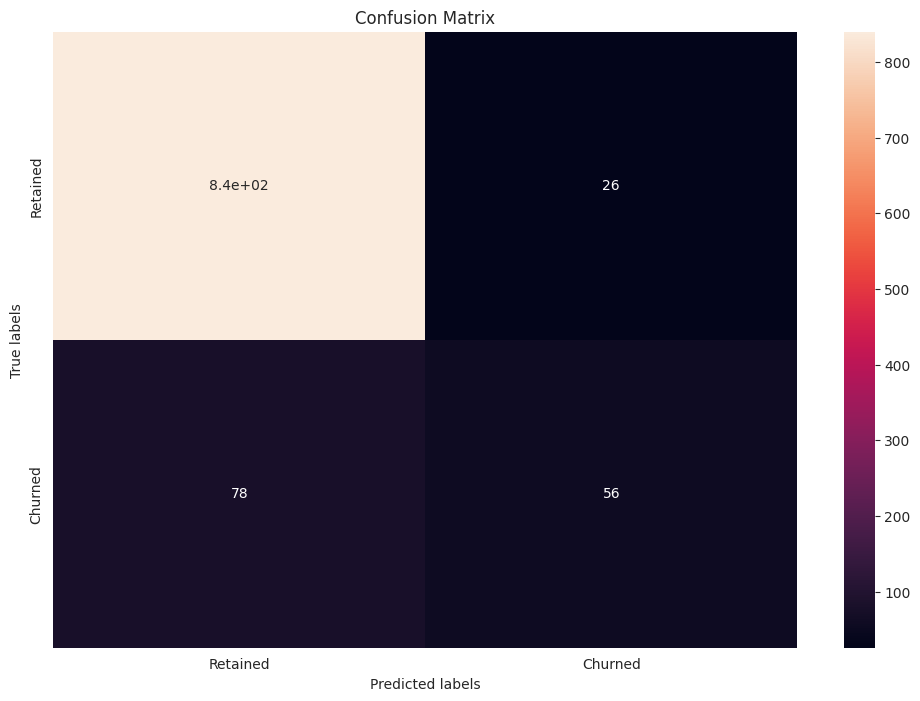

In [152]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [184]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1984
        True       1.00      1.00      1.00       349

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

 
roc_auc_score
1.0


In [185]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

       False       0.98      0.92      0.95       919
        True       0.45      0.74      0.56        81

    accuracy                           0.91      1000
   macro avg       0.71      0.83      0.75      1000
weighted avg       0.93      0.91      0.92      1000

 
roc_auc_score
0.7117558856985281


Then, I used Random Forest algorithm to create the model. As I got there is overfitting seen.

For training dataset, i found precision of 100% and recall of 100% and f1-score of 100% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 100% and recall of 100% and f1-score of 100%. Accuracy is 100% and average percision, recall & f1_score are 100%, 100% and 100% respectively with a roc auc score of 100%.

For testing dataset, i found precision of 98% and recall of 91% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 38% and recall of 75% and f1-score of 50%. Accuracy is 90% and average percision, recall & f1_score are 68%, 83% and 72% respectively with a roc auc score of 67%.

Next tryting to improving the score by using hyperparameter tuning technique.

In [186]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [187]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
5,Days_1call_duration,0.20
6,intern_1call_duration,0.16
4,Customer service calls,0.15
7,evening_1call_duration,0.13
8,night_1call_duration,0.12
0,Account length,0.11
2,International plan,0.08
1,Area code,0.03
3,Voice mail plan,0.03


In [188]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

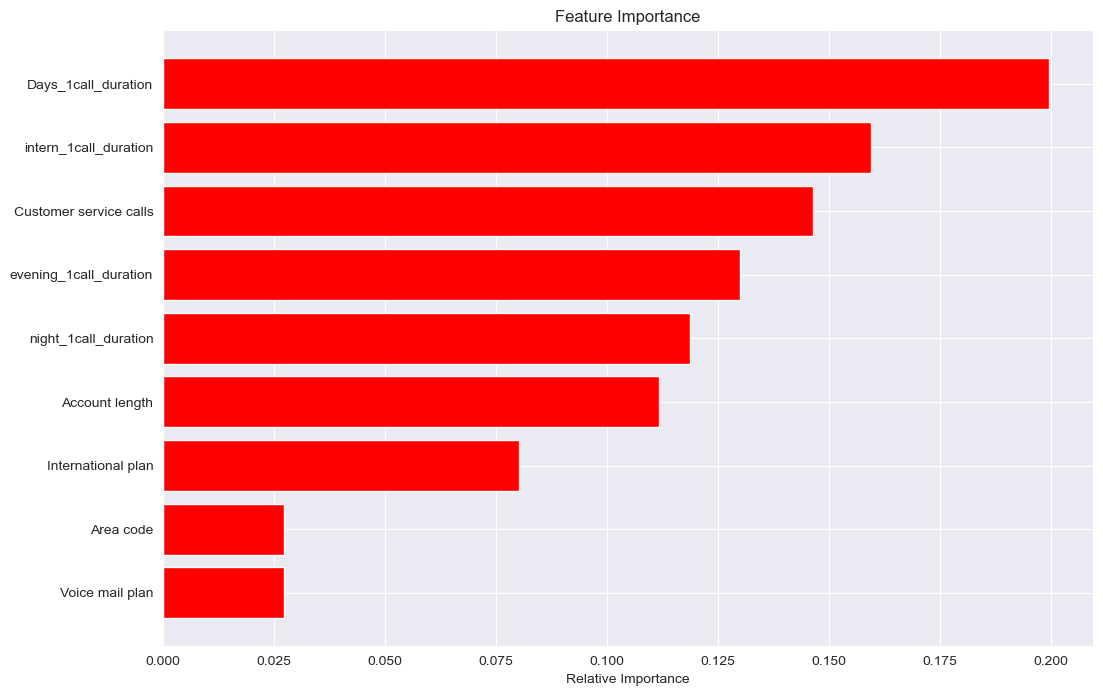

In [189]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### We got test accuracy in randomforest before hyperparameter tuning- 90.2%, but overfitting is seen

#### . Cross- Validation & Hyperparameter Tuning

In [190]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
# n_estimators = [50,80,100]

# # Maximum depth of trees
# max_depth = [4,6,8]

# # Minimum number of samples required to split a node
# min_samples_split = [50,100,150]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [40,50]

## best params are : 'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100
n_estimators=100
max_depth=8
min_samples_leaf = 40
min_samples_split = 50


# # HYperparameter Grid
# param_dict = {'n_estimators' : n_estimators,
#               'max_depth' : max_depth,
#               'min_samples_split' : min_samples_split,
#               'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=n_estimators , max_depth=max_depth , min_samples_leaf=min_samples_leaf , min_samples_split=min_samples_split)

# Grid search
# rf_grid = GridSearchCV(estimator=rf_model,
#                        param_grid = param_dict,
#                        cv = 5, verbose=2, scoring='f1')

# # Fit the Algorithm
# rf_grid.fit(X_train,y_train)



# # Predict on the model
# # Making predictions on train and test data
# train_class_preds = rf_grid.predict(X_train)
# test_class_preds = rf_grid.predict(X_test)


In [160]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.139210 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 100}


In [191]:

# Fit the Algorithm
rf_clf = rf_model.fit(X_train,y_train)

In [192]:
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [193]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.864123446206601
The accuracy on test data is  0.872


[[1984    0]
 [ 317   32]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

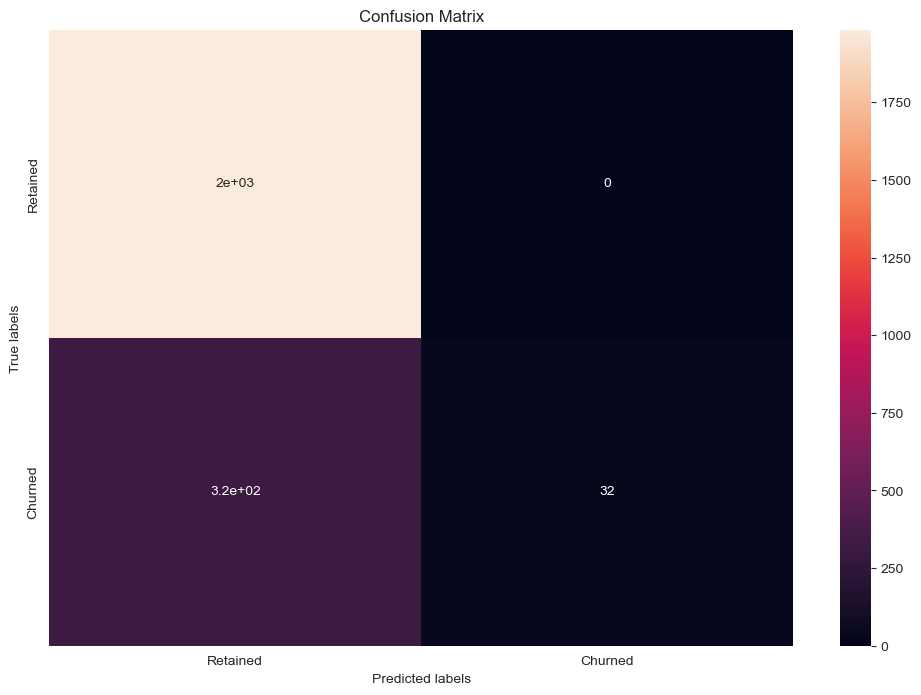

In [194]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[863   3]
 [125   9]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

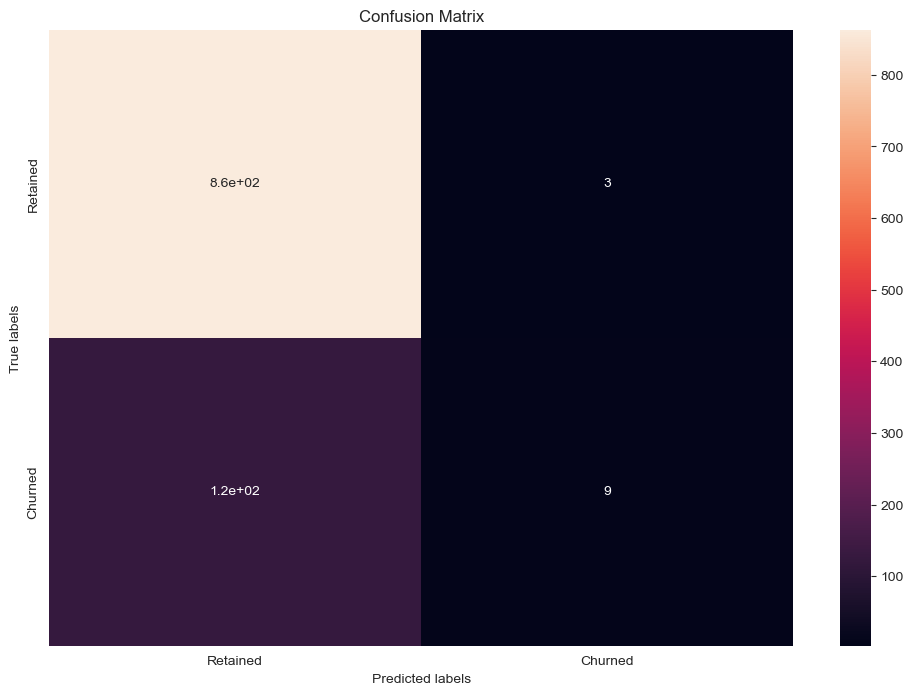

In [195]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [196]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

       False       1.00      0.86      0.93      2301
        True       0.09      1.00      0.17        32

    accuracy                           0.86      2333
   macro avg       0.55      0.93      0.55      2333
weighted avg       0.99      0.86      0.92      2333

 
roc_auc_score
0.5458452722063037


In [197]:
# Hypertuned Random Forest
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

       False       1.00      0.87      0.93       988
        True       0.07      0.75      0.12        12

    accuracy                           0.87      1000
   macro avg       0.53      0.81      0.53      1000
weighted avg       0.99      0.87      0.92      1000

 
roc_auc_score
0.5318499879356107


GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. 
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model. 



For training dataset, i found precision of 100% and recall of 87% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 12% and recall of 93% and f1-score of 22%. Accuracy is 88% and average percision, recall & f1_score are 56%, 90% and 57% respectively with a roc auc score of 56%.

Quite improvment seen as no overfitting but the scores reduced by some percentages.

For testing dataset, i found precision of 100% and recall of 88% and f1-score of 93% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 13% and recall of 90% and f1-score of 23%. Accuracy is 88% and average percision, recall & f1_score are 56%, 89% and 58% respectively with a roc auc score of 56%.

Quite improvemnt seen in recall but rest scores have decreased.


#### after hyperparameter tuning, we got accuracy of 87%, but no overfitting

### ML Model - 3 - **Implementing XgBoost Classifier**

In [198]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

In [199]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9987141020145736
The accuracy on test data is  0.882


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1984    0]
 [   3  346]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

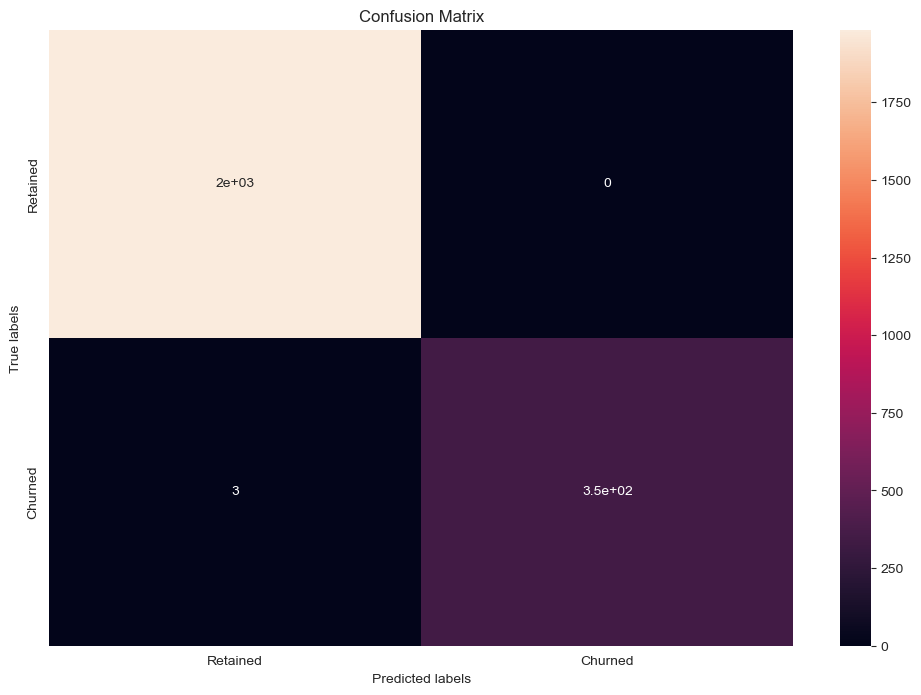

In [200]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[825  41]
 [ 77  57]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

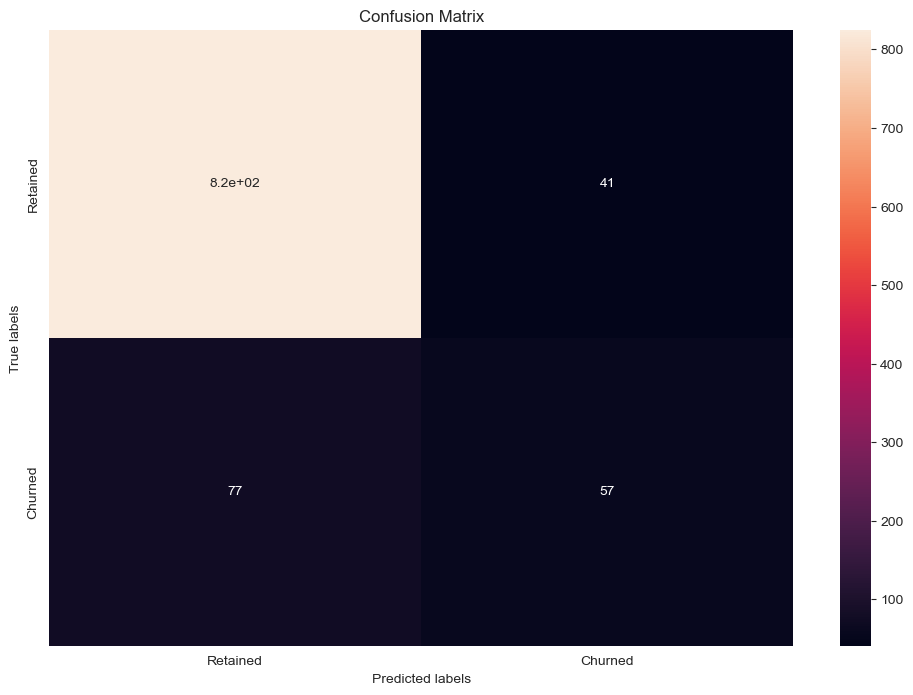

In [201]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [202]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1987
           1       0.99      1.00      1.00       346

    accuracy                           1.00      2333
   macro avg       1.00      1.00      1.00      2333
weighted avg       1.00      1.00      1.00      2333

 
roc_auc_score
0.995702005730659


In [203]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       902
           1       0.43      0.58      0.49        98

    accuracy                           0.88      1000
   macro avg       0.69      0.75      0.71      1000
weighted avg       0.90      0.88      0.89      1000

 
roc_auc_score
0.6890145117369274


Using XGBoost algorithm to create the model. As I got there  good result.


In [204]:
importances = xg_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [205]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
2,International plan,0.35
4,Customer service calls,0.17
3,Voice mail plan,0.14
5,Days_1call_duration,0.08
6,intern_1call_duration,0.07
7,evening_1call_duration,0.06
0,Account length,0.05
8,night_1call_duration,0.05
1,Area code,0.04


In [206]:
features = X_train.columns
importances = xg_model.feature_importances_
indices = np.argsort(importances)

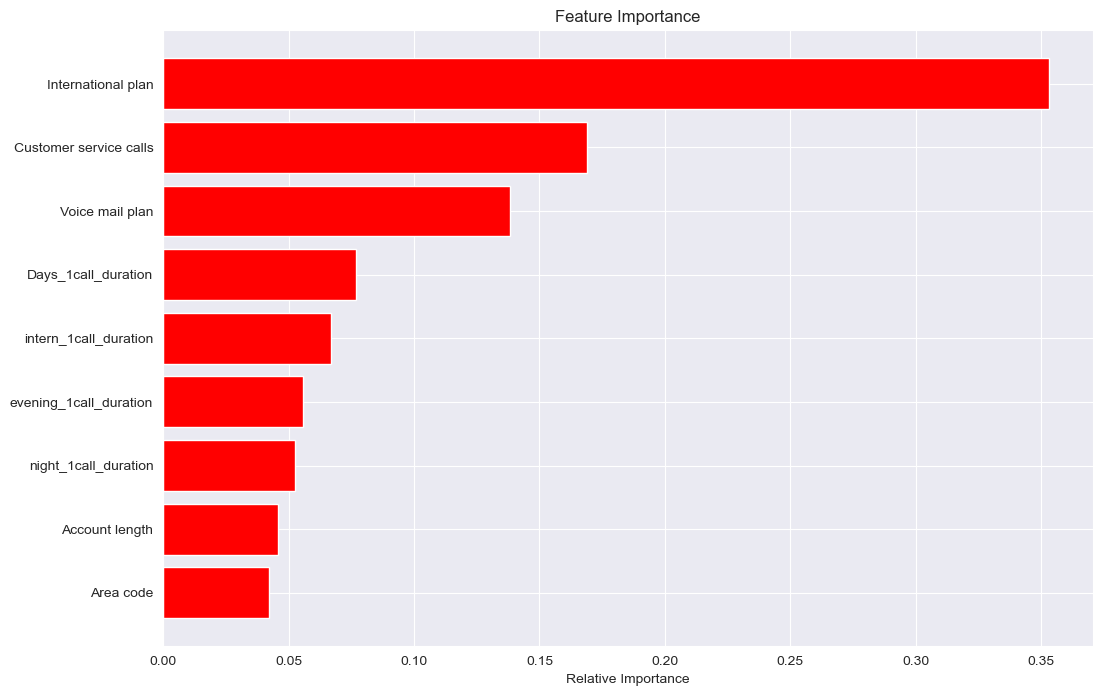

In [207]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### before hyperprameter tuning we got accuracy of 89% on test and 99% on train.

#### 2. Cross- Validation & Hyperparameter Tuning

In [208]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier


## best model :  max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50
n_estimators=50
max_depth=4
min_samples_leaf = 40
min_samples_split = 50


xg_model = XGBClassifier(n_estimators=n_estimators , max_depth=max_depth , min_samples_leaf=min_samples_leaf , min_samples_split=min_samples_split)

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

# xg_grid1=xg_grid.fit(X_train,y_train)

# # Predict on the model
# # Making predictions on train and test data

# train_class_preds = xg_grid1.predict(X_train)
# test_class_preds = xg_grid1.predict(X_test)


In [181]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.822479 using {'max_depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


In [209]:
xg_clf = xg_model.fit(X_train,y_train)

In [210]:
## Predict on the model
## Making predictions on train and test data

train_class_preds = xg_clf.predict(X_train)
test_class_preds = xg_clf.predict(X_test)

In [211]:
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9451350192884698
The accuracy on test data is  0.89


[[1980    4]
 [ 124  225]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

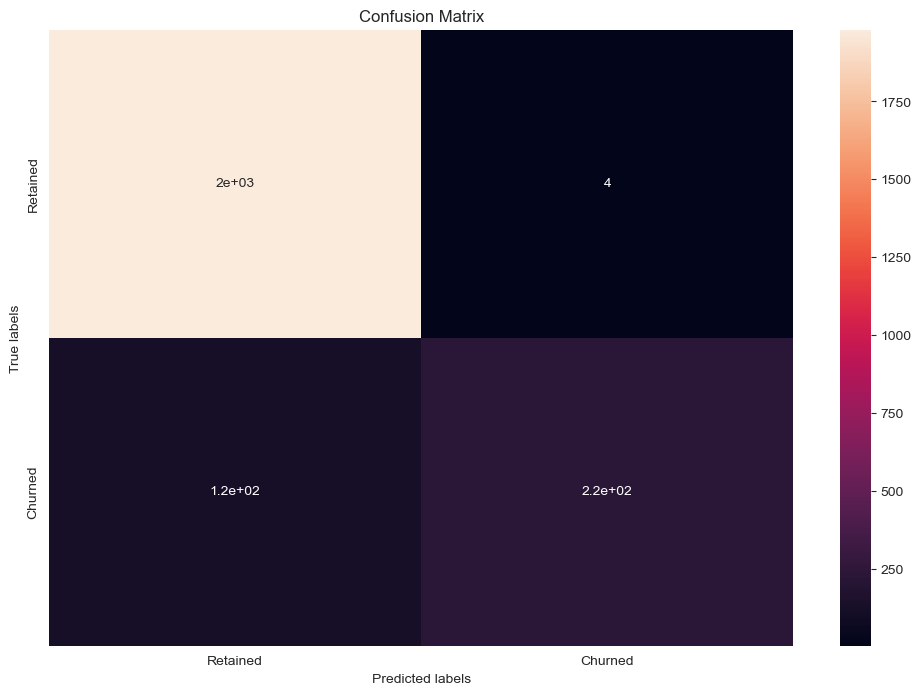

In [212]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[833  33]
 [ 77  57]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

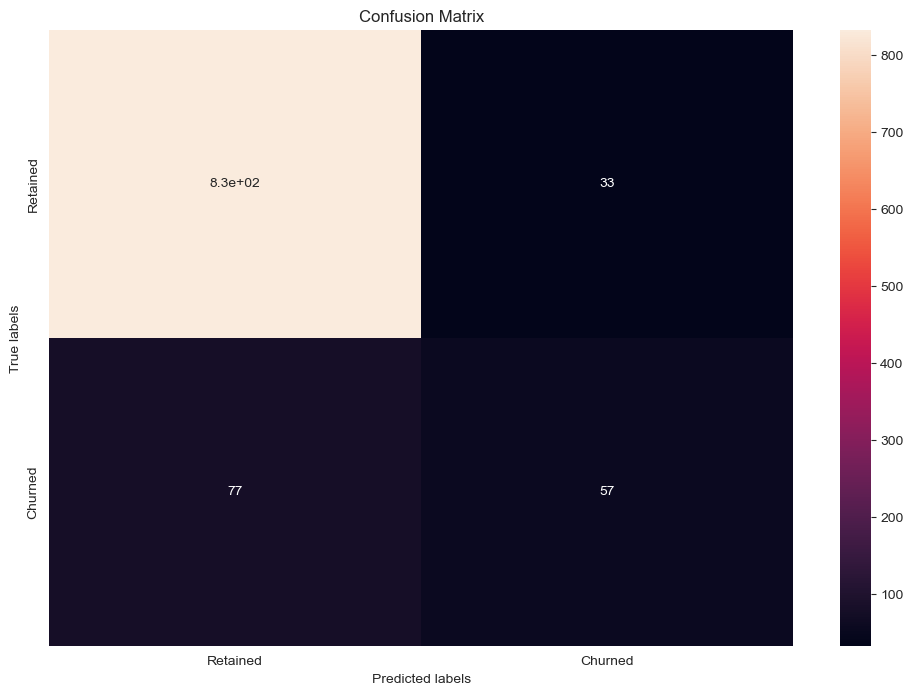

In [213]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [214]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      2104
           1       0.64      0.98      0.78       229

    accuracy                           0.95      2333
   macro avg       0.82      0.96      0.87      2333
weighted avg       0.96      0.95      0.95      2333

 
roc_auc_score
0.8213415056844441


In [215]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       910
           1       0.43      0.63      0.51        90

    accuracy                           0.89      1000
   macro avg       0.69      0.77      0.72      1000
weighted avg       0.91      0.89      0.90      1000

 
roc_auc_score
0.6936334493812691


#### after hyperparameter tuning we got accuracy of 90% on test and 94 on train. for xgboosting

##########################################################################################################

# **Conclusion**

1. Here are some solution to Reduce Customer Churn

* Modify International Plan as the charge is same as normal one.
* Be proactive with communication.
* Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problem in the most churning states.
* Lean into best customers.
* Regular Server Maintenance.
* Solving Poor Network Connectivity Issue.
* Define a roadmap for new customers.
* Analyze churn when it happens.
* Stay competitive.

2. The four charge fields are linear functions of the minute fields.

3. The area code field and/or the state field are anomalous, and can be omitted.

4. Customers with the International Plan tend to churn more frequently.

5. Customers with four or more customer service calls churn more than four times as often as do the other customers.

6. Customers with high day minutes and evening minutes tend to churn at a higher rate than do the other customers.

7. There is no obvious association of churn with the variables day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

8. We can deploy the model with XGBoost algorithm. Because For training dataset, i found precision of 100% and recall of 94% and f1-score of 97% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 64% and recall of 98% and f1-score of 68%. Accuracy is 95% and average percision, recall & f1_score are 82%, 96% and 87% respectively with a roc auc score of 82%. For testing dataset, i found precision of 96% and recall of 92% and f1-score of 94% for False Churn customer data. BUt, I am also interested to see the result for Churning cutomer result as I got precision of 43% and recall of 63% and f1-score of 51%. Accuracy is 90% and average percision, recall & f1_score are 69%, 77% and 72% respectively with a roc auc score of 69%. It's the best performing model i found.

9. No overfitting is seen.

10. Due to less no. of data in the dataset, the scores are around 80%. Once we get more data we can retrain our algorithm for better performance.

In [217]:
model = xg_model.fit(X,Y)

In [220]:
import pickle

# Save to file in the current working directory
pkl_filename = "model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [221]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [222]:
score = pickle_model.score(X_test, y_test)
print("Test score: {0:.2f} %".format(100 * score))

Test score: 94.30 %


In [225]:
# Ypredict = pickle_model.predict(X_test)
# print(Ypredict)

In [227]:
# pkl_filename = "model.pkl"
# with open(pkl_filename, 'rb') as f_in:
#     model = pickle.load(f_in)

# predictValue = predict_mpg(config, model)
# predictValue

In [228]:
sav_filename = "trained.sav"
import pickle


In [229]:
with open(sav_filename, 'wb') as file:
    pickle.dump(model, file)

In [234]:
load_model = pickle.load(open(sav_filename,'rb'))

In [236]:
load_model.score(X_test,y_test)

0.943

In [238]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [237]:
X.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Customer service calls', 'Days_1call_duration',
       'intern_1call_duration', 'evening_1call_duration',
       'night_1call_duration'],
      dtype='object')

In [ ]:
# Creating call duration column for customers with no international plan
df1['Days_1call_duration']=df1['Total day minutes']/df1['Total day calls']
df1['intern_1call_duration']=df1['Total intl minutes']/df1['Total intl calls']

df1['evening_1call_duration']=df1['Total eve minutes']/df1['Total eve calls']
df1['night_1call_duration']=df1['Total night minutes']/df1['Total night calls']

In [ ]:
np.isinf(df1).values.sum()
df1.replace([np.inf, -np.inf], 0, inplace=True)

In [200]:
#########################################################################################################

In [ ]:
df.replace(["No", "Yes"], [0, 1], inplace=True)
df.replace([False, True], [0, 1], inplace=True)
df

In [ ]:
data=df.drop("State",axis=1)
fig,ax=plt.subplots(figsize=(16,13))
ax=sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt=".2f",linewidths=0.5)

In [ ]:
droplist=["Number vmail messages","Total day minutes","Total eve charge","Total night minutes","Total intl charge"]
df.drop(droplist,axis=1,inplace=True)
data=df.drop("State",axis=1)
fig,ax=plt.subplots(figsize=(16,13))
ax=sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', fmt=".2f",linewidths=0.5)

In [ ]:
np.random.seed(42)
x=df.drop("Churn", axis=1)
y=df["Churn"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)
x_train

In [ ]:
x_train.info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

transformer=ColumnTransformer([("one_hot",OneHotEncoder(),one_hot),
                                ("label",OrdinalEncoder(),label),
                                  ("scaler",StandardScaler(),col)],remainder="passthrough")
transform_train = transformer.fit_transform(x_train)
transform_test=transformer.transform(x_test)
transform_train

In [ ]:
transform_train.shape

In [ ]:
train_transformed=pd.DataFrame(transform_train)
test_transformed=pd.DataFrame(transform_test)
train_transformed